<a href="https://colab.research.google.com/github/kamalupadhaya/machine_learning/blob/main/MLPP_Final_Project_Report_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AIR QUALITY INDEX AND ITS IMPACT ON ASTHMA IN CALIFORNIA

**Work done by each members**:

**Kamal:** Data finding for Asthma and geoshape data, data cleaning (aqi and asthma), finding correlation between data, histogram, clustering for both aqi and asthma data, choropleth for both aqi and asthma data, heat map for both asthma and aqi, data merging, time series conversion, machine learning model creating and fitting (svm classifier)

**Kalen:** Data finding asthma, Machine learing model fitting, clustering, data merging

**Kunal:** Data finding for air quality index, Data cleaning for AQI, Choropleth plots, finding correlation between data, machine learning model creating and fitting (Linear regression, Decision Tree regression, Random Forest regression, Gradient Boosting regression), Tuning hyperparamters using GridSearchCV, Applied regularization techniques such as Ridge Regression or Lasso Regression

**Aakarsh:** Data finding for aqi, Clustering data, Machine learning model creation, Model fitting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing and mounting our libraries and google drive

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


installing geopandas

We have following two sets of data being used in this Notebook.

Air Quality Data (- From US Environmental Protection Agency)EPA[AQI](https://www.epa.gov/outdoor-air-quality-data)

Asthma ( Centers for Disease Control and Prevention ) CDC [Asthma](https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Asthma/us8e-ubyj)

In [ ]:
#--file locations
file1= '/content/drive/Shareddrives/MLPP Final Project /aqi_yearly_1980_to_2021.csv'
file2 = '/content/drive/Shareddrives/MLPP Final Project /asthmaedvisitrates-by-zipcode-2013to2019-ca-cdph_with-county (1).csv'

#--reading the files
aqi=pd.read_csv(file1)
asthma=pd.read_csv(file2)

In [ ]:
#--taking only data from year 2013 to 2019 as we have asthma data for these year only
aqi = aqi[(aqi['Year'] >= 2013) & (aqi['Year'] <= 2019)]
aqi

#--selecting state with California
aqi = aqi[aqi['State'] == 'California']
aqi

#--taking only data from year 2013 to 2019 as we have asthma data for these year only
aqi = aqi[(aqi['Year'] >= 2013) & (aqi['Year'] <= 2019)]
aqi

State     County  Year  Days with AQI  Good Days  Moderate Days  \
26162  California    Alameda  2013            365        189            168   
26163  California     Amador  2013            365        301             62   
26164  California      Butte  2013            365        147            209   
26165  California  Calaveras  2013            364        248            114   
26166  California     Colusa  2013            364        250            112   
...           ...        ...   ...            ...        ...            ...   
32211  California    Trinity  2019            269        246             21   
32212  California     Tulare  2019            365        127            157   
32213  California   Tuolumne  2019            358        273             83   
32214  California    Ventura  2019            365        214            142   
32215  California       Yolo  2019            365        284             80   

       Unhealthy for Sensitive Groups Days  Unhealthy Days  \
26162                                    8               0   
26163                                    2               0   
26164                                    8               1   
26165                                    2               0   
26166                                    2               0   
...                                    ...             ...   
32211                                    2               0   
32212                                   78               2   
32213                                    2               0   
32214                                    9               0   
32215                                    1               0   

       Very Unhealthy Days  Hazardous Days  ...  90th Percentile AQI  \
26162                    0               0  ...                   79   
26163                    0               0  ...                   61   
26164                    0               0  ...                   90   
26165                    0               0  ...                   64   
26166                    0               0  ...                   63   
...                    ...             ...  ...                  ...   
32211                    0               0  ...                   49   
32212                    1               0  ...                  122   
32213                    0               0  ...                   67   
32214                    0               0  ...                   77   
32215                    0               0  ...                   61   

       Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  Days PM2.5  \
26162          50        0        13          83         0         269   
26163          38        0         0         365         0           0   
26164          54        0         0         221         0         144   
26165          45        0         0         229         0         135   
26166          41        0         0         151         0         208   
...           ...      ...       ...         ...       ...         ...   
32211          18        0         0           0         0         269   
32212          66        0         2         242         0          99   
32213          43        0         0         358         0           0   
32214          46        0         5         284         0          65   
32215          41        0         1         279         0          82   

       Days PM10   Latitude   Longitude  
26162          0  37.654456 -122.031547  
26163          0  38.690662 -120.072754  
26164          0  39.327563 -121.668811  
26165          0  38.201850 -120.680277  
26166          5  39.189190 -121.998870  
...          ...        ...         ...  
32211          0  40.786247 -122.805707  
32212         22  36.031831 -119.055018  
32213          0  37.981780 -120.378551  
32214         11  34.252390 -119.143182  
32215          3  38.571460 -121.525790  

[371 rows x 21 columns]

In [ ]:
#--to check the information about the dataframe
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 26162 to 32215
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                371 non-null    object 
 1   County                               371 non-null    object 
 2   Year                                 371 non-null    int64  
 3   Days with AQI                        371 non-null    int64  
 4   Good Days                            371 non-null    int64  
 5   Moderate Days                        371 non-null    int64  
 6   Unhealthy for Sensitive Groups Days  371 non-null    int64  
 7   Unhealthy Days                       371 non-null    int64  
 8   Very Unhealthy Days                  371 non-null    int64  
 9   Hazardous Days                       371 non-null    int64  
 10  Max AQI                              371 non-null    int64  
 11  90th Percentile AQI       

In [ ]:
#--renaming columns
asthma.columns = ['Year', 'Zip', 'People with Asthma', 'Rates per 10,000', 'Age', 'County']
asthma

Year    Zip  People with Asthma  Rates per 10,000  Age       County
0      2013  90001                 240              79.9  18+  Los Angeles
1      2013  90002                 215              67.8  18+  Los Angeles
2      2013  90003                 287              73.4  18+  Los Angeles
3      2013  90004                 101              21.7  18+  Los Angeles
4      2013  90005                  76              24.3  18+  Los Angeles
...     ...    ...                 ...               ...  ...          ...
14102  2019  96101                  45             138.0  18+        Modoc
14103  2019  96122                  23              86.3  18+       Plumas
14104  2019  96130                  62              35.4  18+       Lassen
14105  2019  96150                  43              17.7  18+    El Dorado
14106  2019  96161                  18              12.2  18+       Nevada

[14107 rows x 6 columns]

In [ ]:
#--drop zip column
asth = asthma.drop(columns=['Zip'])
asth

Year  People with Asthma  Rates per 10,000  Age       County
0      2013                 240              79.9  18+  Los Angeles
1      2013                 215              67.8  18+  Los Angeles
2      2013                 287              73.4  18+  Los Angeles
3      2013                 101              21.7  18+  Los Angeles
4      2013                  76              24.3  18+  Los Angeles
...     ...                 ...               ...  ...          ...
14102  2019                  45             138.0  18+        Modoc
14103  2019                  23              86.3  18+       Plumas
14104  2019                  62              35.4  18+       Lassen
14105  2019                  43              17.7  18+    El Dorado
14106  2019                  18              12.2  18+       Nevada

[14107 rows x 5 columns]

In [ ]:
#--adding people with asthma from same county and same year. For age column we just take the first value since they should all be same for a given year and county 
asth = asth.groupby(['Year', 'County'], as_index=False).agg({
    'People with Asthma': 'sum',
    'Rates per 10,000': 'sum',
    'Age': 'first'
})
asth

Year     County  People with Asthma  Rates per 10,000   Age
0    2013    Alameda                9866            6465.7   18+
1    2013     Amador                 207             533.8   18+
2    2013      Butte                 906             856.8   18+
3    2013  Calaveras                 117             263.0   18+
4    2013     Colusa                  54             193.5   18+
..    ...        ...                 ...               ...   ...
386  2019     Tulare                1798            1275.5  0-17
387  2019   Tuolumne                 152             243.9  0-17
388  2019    Ventura                2334            1325.2  0-17
389  2019       Yolo                 683             536.5  0-17
390  2019       Yuba                 302             238.4  0-17

[391 rows x 5 columns]

In [ ]:
# merge two data frames based upon same values under two columns
mer_df = pd.merge(aqi, asth, left_on=['County', 'Year'], right_on=['County', 'Year'])

# Select only the rows that match both conditions
aqiasthma = mer_df[(mer_df['Year'] == mer_df['Year']) & (mer_df['State'] == mer_df['State'])].copy()
aqiasthma

State     County  Year  Days with AQI  Good Days  Moderate Days  \
0    California    Alameda  2013            365        189            168   
1    California     Amador  2013            365        301             62   
2    California      Butte  2013            365        147            209   
3    California  Calaveras  2013            364        248            114   
4    California     Colusa  2013            364        250            112   
..          ...        ...   ...            ...        ...            ...   
365  California    Trinity  2019            269        246             21   
366  California     Tulare  2019            365        127            157   
367  California   Tuolumne  2019            358        273             83   
368  California    Ventura  2019            365        214            142   
369  California       Yolo  2019            365        284             80   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                      8               0                    0   
1                                      2               0                    0   
2                                      8               1                    0   
3                                      2               0                    0   
4                                      2               0                    0   
..                                   ...             ...                  ...   
365                                    2               0                    0   
366                                   78               2                    1   
367                                    2               0                    0   
368                                    9               0                    0   
369                                    1               0                    0   

     Hazardous Days  ...  Days NO2  Days Ozone  Days SO2  Days PM2.5  \
0                 0  ...        13          83         0         269   
1                 0  ...         0         365         0           0   
2                 0  ...         0         221         0         144   
3                 0  ...         0         229         0         135   
4                 0  ...         0         151         0         208   
..              ...  ...       ...         ...       ...         ...   
365               0  ...         0           0         0         269   
366               0  ...         2         242         0          99   
367               0  ...         0         358         0           0   
368               0  ...         5         284         0          65   
369               0  ...         1         279         0          82   

     Days PM10   Latitude   Longitude  People with Asthma  Rates per 10,000  \
0            0  37.654456 -122.031547                9866            6465.7   
1            0  38.690662 -120.072754                 207             533.8   
2            0  39.327563 -121.668811                 906             856.8   
3            0  38.201850 -120.680277                 117             263.0   
4            5  39.189190 -121.998870                  54             193.5   
..         ...        ...         ...                 ...               ...   
365          0  40.786247 -122.805707                  15              56.7   
366         22  36.031831 -119.055018                1798            1275.5   
367          0  37.981780 -120.378551                 152             243.9   
368         11  34.252390 -119.143182                2334            1325.2   
369          3  38.571460 -121.525790                 683             536.5   

      Age  
0     18+  
1     18+  
2     18+  
3     18+  
4     18+  
..    ...  
365   18+  
366  0-17  
367  0-17  
368  0-17  
369  0-17  

[370 rows x 24 columns]

After merging our datasets, we want to check what our data values are like and how they relate to each other

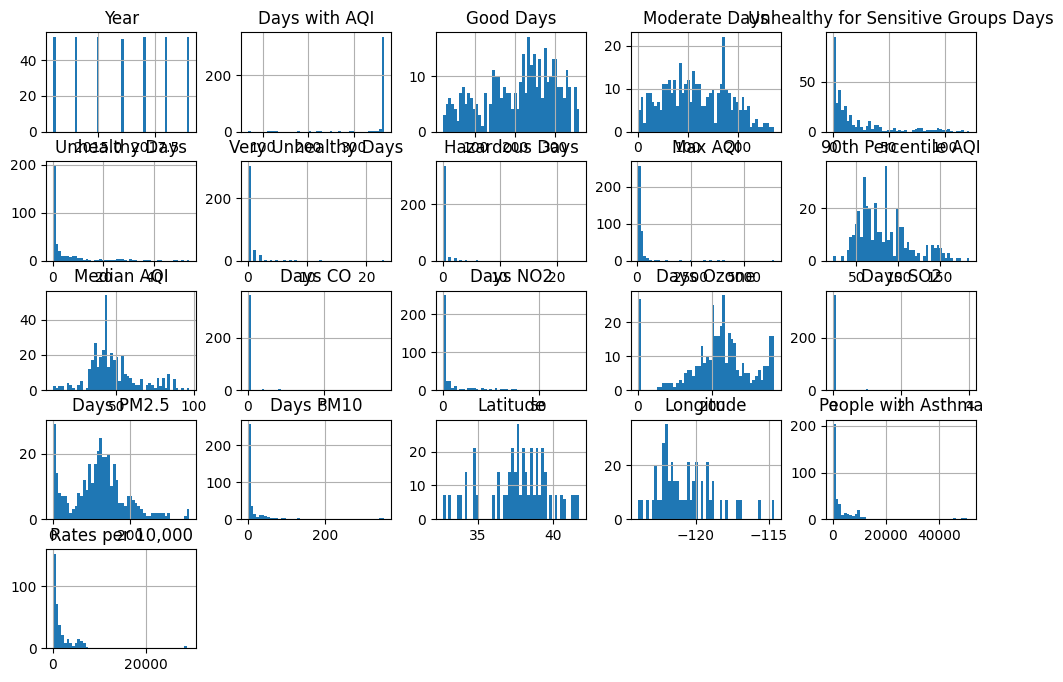

In [ ]:
#--create a histogram
aqiasthma.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
#--looking for correlations
corr_matrix = aqiasthma.corr()

#--looking the correlation between people with asthma and other attributing factors
corr_matrix['People with Asthma'].sort_values(ascending=False)

<ipython-input-12-895ad3432cc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = aqiasthma.corr()


People with Asthma                     1.000000
Rates per 10,000                       0.994909
Median AQI                             0.462999
Unhealthy Days                         0.462275
Unhealthy for Sensitive Groups Days    0.448343
90th Percentile AQI                    0.443991
Days NO2                               0.438758
Moderate Days                          0.420886
Longitude                              0.314473
Very Unhealthy Days                    0.268571
Days PM2.5                             0.170403
Days with AQI                          0.100210
Days CO                                0.031693
Days SO2                              -0.007258
Year                                  -0.022910
Max AQI                               -0.039371
Hazardous Days                        -0.060081
Days PM10                             -0.074344
Days Ozone                            -0.103701
Latitude                              -0.403166
Good Days                             -0

We see that rates per 10,000, median AQI, Unhealthy Days, Unhealthy for Sensitive Groups Days, 90th Percentile AQI, Days NO2, Moderate Days, Longitude, Very Unhealthy Days are highly correlated in the positive direction (correlation with People with Asthma >= 0.25)

Highly correlated in the negative direction are Latitude and Good Days 

We focus on Median AQI/Unhealthy days and other positive correlations while ignoring the negative correlations

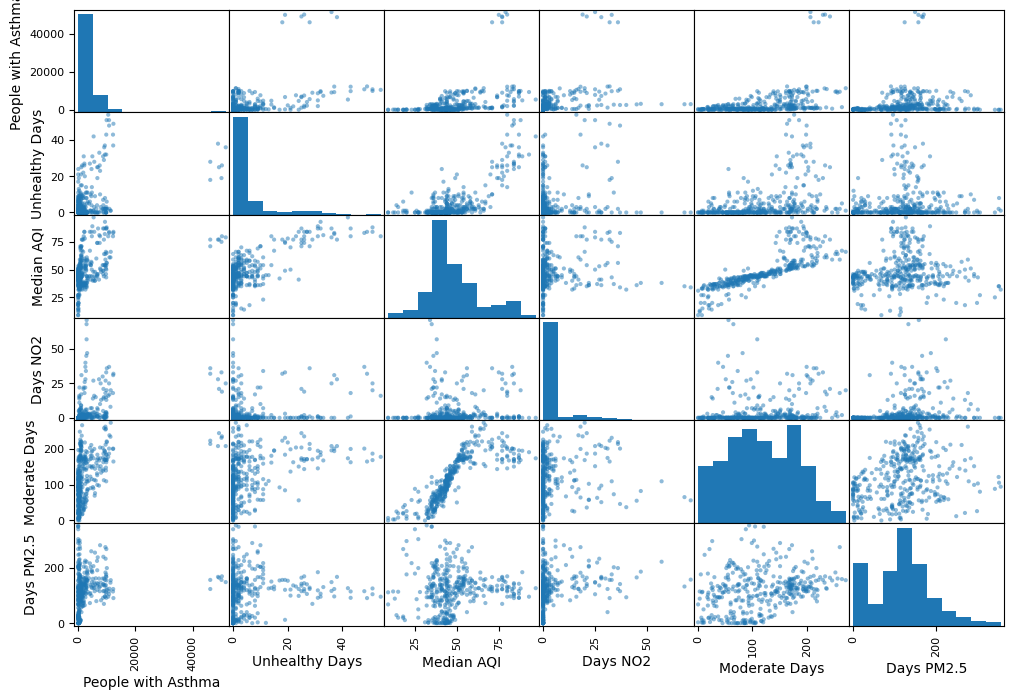

In [ ]:
#--looks like there are some good correlation between people with asthma and few other components as shown below
#--we will be looking only on these components for the sake of this project

from pandas.plotting import scatter_matrix

attributes = ['People with Asthma', 'Unhealthy Days', 'Median AQI', 'Days NO2', 'Moderate Days', 'Days PM2.5', ]

scatter_matrix(aqiasthma[attributes], figsize=(12,8))
plt.show()

Next we are looking into the population plot in California 

In [ ]:
#--shape file for California
# -- import geopandas to work with geospatial data
import geopandas as gp
path = '/content/drive/Shareddrives/MLPP Final Project /California_Zip_Codes/California_Zip_Codes.shp'
geoshp = gp.read_file(path)

In [ ]:
#--see tehh data type
geoshp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    1721 non-null   int64   
 1   ZIP_CODE    1721 non-null   object  
 2   PO_NAME     1721 non-null   object  
 3   STATE       1721 non-null   object  
 4   POPULATION  1721 non-null   int64   
 5   POP_SQMI    1721 non-null   float64 
 6   SQMI        1721 non-null   float64 
 7   SHAPE_Leng  1721 non-null   float64 
 8   SHAPE_Area  1721 non-null   float64 
 9   geometry    1721 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(3)
memory usage: 134.6+ KB


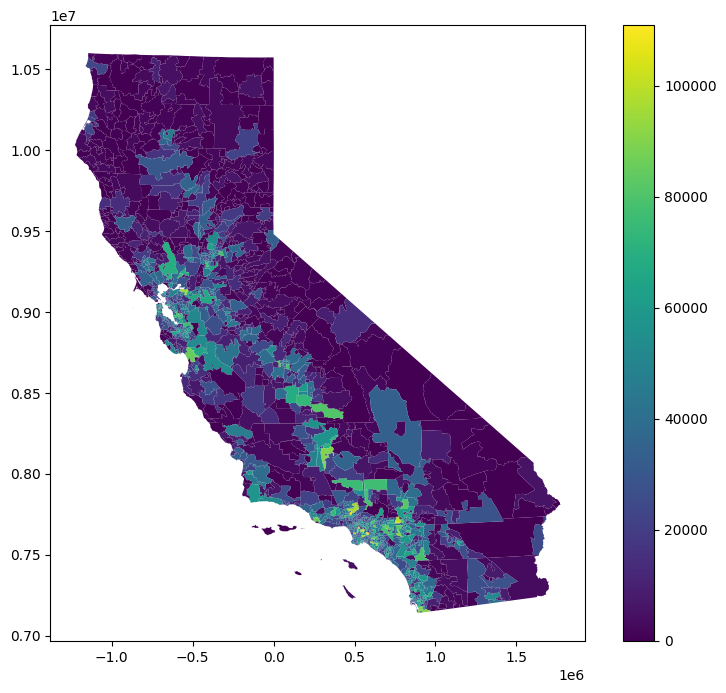

In [ ]:
# -- plot a "choropleth" of the population
fig, ax = plt.subplots(figsize=(10, 8))
geoshp.plot('POPULATION', legend=True, ax=ax)
ax.grid(False)

fig.show()

Data transformation to prepare our dataset to plot choropleths of some variables

In [ ]:
#--transform the data for asthma keeping the zip code as column and creating new columns from 2013 to 2019
# Define a list of the years to include in the new dataframe
years = list(range(2013, 2020))

# Create an empty dataframe to store the asthmatran data
asthmatran = pd.DataFrame(columns=['Zip'] + [str(year) + '_Asthma' for year in years] + ['Rates per 10,000', 'Age', 'County'])

# Loop over each zip code in the original dataframe
for zip_code in asthma['Zip'].unique():
    # Select the rows for the current zip code
    rows = asthma.loc[asthma['Zip'] == zip_code]
    
    # Create a dictionary to store the asthmatran data for the current zip code
    data = {'Zip': zip_code, 'County': rows.iloc[0]['County'], 'Rates per 10,000': rows.iloc[0]['Rates per 10,000'], 'Age': rows.iloc[0]['Age']}
    
    # Loop over each year in the list of years
    for year in years:
        # Get the row for the current year and zip code
        row = rows.loc[rows['Year'] == year]
        
        # If there is a row for the current year and zip code, add the value to the dictionary
        if len(row) > 0:
            data[str(year) + '_Asthma'] = row.iloc[0]['People with Asthma']
    
    # Add the asthmatran data for the current zip code to the asthmatran dataframe
    asthmatran = asthmatran.append(data, ignore_index=True)

# Drop any rows containing NaN values
asthmatran.dropna(inplace=True)

<ipython-input-17-d4cbde649384>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  asthmatran = asthmatran.append(data, ignore_index=True)
<ipython-input-17-d4cbde649384>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  asthmatran = asthmatran.append(data, ignore_index=True)
<ipython-input-17-d4cbde649384>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  asthmatran = asthmatran.append(data, ignore_index=True)
<ipython-input-17-d4cbde649384>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  asthmatran = asthmatran.append(data, ignore_index=True)
<ipython-input-17-d4cbde649384>:26: FutureWarning: The frame.append method is deprecated and

In [ ]:
asthmatran

Zip 2013_Asthma 2014_Asthma 2015_Asthma 2016_Asthma 2017_Asthma  \
0     90001         240         222         229         205         244   
1     90002         215         231         249         236         270   
2     90003         287         342         385         383         378   
3     90004         101         108         150         157         154   
4     90005          76          80          68          65          67   
...     ...         ...         ...         ...         ...         ...   
1107  92249          33          17          16          15          23   
1111  93434          34          17          33          22          16   
1113  93609          34          21          18          13          21   
1126  95324          17          19          13          16          17   
1182  93615          13          18          29          29          15   

     2018_Asthma 2019_Asthma  Rates per 10,000   Age         County  
0            215         204              79.9   18+    Los Angeles  
1            232         218              67.8   18+    Los Angeles  
2            393         369              73.4   18+    Los Angeles  
3            162         108              21.7   18+    Los Angeles  
4             54          82              24.3   18+    Los Angeles  
...          ...         ...               ...   ...            ...  
1107          15          19              34.5   18+       Imperial  
1111          14          18              36.1   18+  Santa Barbara  
1113          17          18              59.5   18+         Fresno  
1126          15          12              36.3   18+         Merced  
1182          20          15              56.5  0-17         Tulare  

[1020 rows x 11 columns]

In [ ]:
asthmatran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1182
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zip               1020 non-null   object 
 1   2013_Asthma       1020 non-null   object 
 2   2014_Asthma       1020 non-null   object 
 3   2015_Asthma       1020 non-null   object 
 4   2016_Asthma       1020 non-null   object 
 5   2017_Asthma       1020 non-null   object 
 6   2018_Asthma       1020 non-null   object 
 7   2019_Asthma       1020 non-null   object 
 8   Rates per 10,000  1020 non-null   float64
 9   Age               1020 non-null   object 
 10  County            1020 non-null   object 
dtypes: float64(1), object(10)
memory usage: 95.6+ KB


In [ ]:
# -- convert zipcode to integer
geoshp['ZIP_CODE'] = geoshp["ZIP_CODE"].astype(int)

In [ ]:
# merge two data frames based upon same values under two columns
geoasthma = geoshp.merge(asthmatran, left_on=['ZIP_CODE'], right_on=['Zip'])

geoasthma

OBJECTID ZIP_CODE           PO_NAME STATE  POPULATION  POP_SQMI    SQMI  \
0           33    90001       Los Angeles    CA       59907  16970.82    3.53   
1           34    90002       Los Angeles    CA       53573  17281.61    3.10   
2           35    90003       Los Angeles    CA       71967  20503.42    3.51   
3           36    90004       Los Angeles    CA       63987  20508.65    3.12   
4           37    90005       Los Angeles    CA       41844  26823.08    1.56   
...        ...      ...               ...   ...         ...       ...     ...   
1015      1680    96101           Alturas    CA        5531      9.61  575.76   
1016      1699    96122           Portola    CA        4034     12.29  328.18   
1017      1706    96130        Susanville    CA       21704     25.69  844.82   
1018      1719    96150  South Lake Tahoe    CA       32999    151.87  217.28   
1019      1720    96161           Truckee    CA       19416     99.57  194.99   

        SHAPE_Leng    SHAPE_Area  \
0     4.469466e+04 -9.828050e+07   
1     4.470584e+04 -8.656244e+07   
2     5.223641e+04 -9.791987e+07   
3     4.395039e+04 -8.689358e+07   
4     4.330153e+04 -4.352816e+07   
...            ...           ...   
1015  7.857564e+05 -1.605115e+10   
1016  8.722457e+05 -9.149186e+09   
1017  1.246027e+06 -2.355170e+10   
1018  4.580447e+05 -6.057234e+09   
1019  4.951101e+05 -5.436059e+09   

                                               geometry  ... 2013_Asthma  \
0     POLYGON ((532456.173 7660538.070, 533148.797 7...  ...         240   
1     POLYGON ((536465.606 7649213.814, 537064.829 7...  ...         215   
2     POLYGON ((525864.950 7660430.160, 526078.120 7...  ...         287   
3     POLYGON ((519399.531 7694652.300, 519458.863 7...  ...         101   
4     POLYGON ((519577.715 7687417.247, 520187.349 7...  ...          76   
...                                                 ...  ...         ...   
1015  POLYGON ((-78483.095 10456521.105, -78227.404 ...  ...          26   
1016  POLYGON ((-59119.592 9866731.607, -59070.734 9...  ...          19   
1017  POLYGON ((-81757.323 10099662.990, -84190.888 ...  ...          50   
1018  POLYGON ((14322.233 9469012.916, 16161.006 946...  ...          48   
1019  POLYGON ((-27833.501 9644370.429, -27746.725 9...  ...          12   

     2014_Asthma 2015_Asthma 2016_Asthma 2017_Asthma 2018_Asthma 2019_Asthma  \
0            222         229         205         244         215         204   
1            231         249         236         270         232         218   
2            342         385         383         378         393         369   
3            108         150         157         154         162         108   
4             80          68          65          67          54          82   
...          ...         ...         ...         ...         ...         ...   
1015          33          26          37          43          47          45   
1016          12          30          24          23          18          23   
1017          42          72          62          71          59          62   
1018          39          69          68          73          56          43   
1019          22          40          26          22          29          18   

     Rates per 10,000  Age       County  
0                79.9  18+  Los Angeles  
1                67.8  18+  Los Angeles  
2                73.4  18+  Los Angeles  
3                21.7  18+  Los Angeles  
4                24.3  18+  Los Angeles  
...               ...  ...          ...  
1015             70.0  18+        Modoc  
1016             57.9  18+       Plumas  
1017             25.6  18+       Lassen  
1018             18.8  18+    El Dorado  
1019              6.7  18+       Nevada  

[1020 rows x 21 columns]

In [ ]:
geoasthma.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID          1020 non-null   int64   
 1   ZIP_CODE          1020 non-null   object  
 2   PO_NAME           1020 non-null   object  
 3   STATE             1020 non-null   object  
 4   POPULATION        1020 non-null   int64   
 5   POP_SQMI          1020 non-null   float64 
 6   SQMI              1020 non-null   float64 
 7   SHAPE_Leng        1020 non-null   float64 
 8   SHAPE_Area        1020 non-null   float64 
 9   geometry          1020 non-null   geometry
 10  Zip               1020 non-null   object  
 11  2013_Asthma       1020 non-null   object  
 12  2014_Asthma       1020 non-null   object  
 13  2015_Asthma       1020 non-null   object  
 14  2016_Asthma       1020 non-null   object  
 15  2017_Asthma       1020 non-null   object  
 16  2018_Asthma     

In [ ]:
geoasthma['2013_Asthma'] = geoasthma['2013_Asthma'].astype(float)
geoasthma['2019_Asthma'] = geoasthma['2019_Asthma'].astype(float)

In [ ]:
geoasthma.columns

Index(['OBJECTID', 'ZIP_CODE', 'PO_NAME', 'STATE', 'POPULATION', 'POP_SQMI',
       'SQMI', 'SHAPE_Leng', 'SHAPE_Area', 'geometry', 'Zip', '2013_Asthma',
       '2014_Asthma', '2015_Asthma', '2016_Asthma', '2017_Asthma',
       '2018_Asthma', '2019_Asthma', 'Rates per 10,000', 'Age', 'County'],
      dtype='object')

In [ ]:
type(geoasthma)

geopandas.geodataframe.GeoDataFrame

Next are the actual cloropleths for People with Asthma 

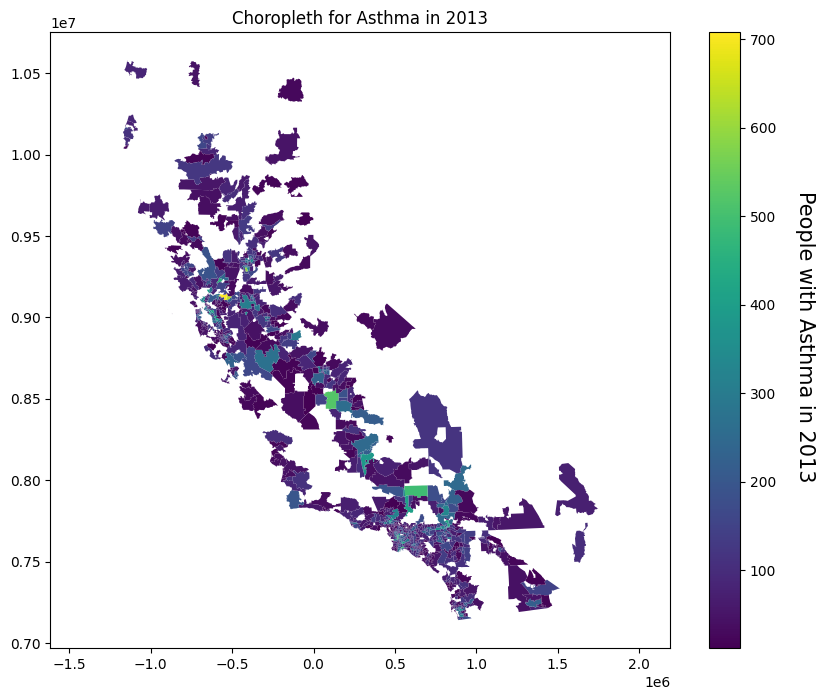

In [ ]:
# -- plot a "choropleth" of the people with asthma in 2013
fig, ax = plt.subplots(figsize=(10, 8))
geoasthma.plot('2013_Asthma', legend =True, ax=ax)
ax.grid(False)
ax.axis("equal")
ax.set_title('Choropleth for Asthma in 2013')
fig.text(0.88, 0.5, "People with Asthma in 2013", 
         fontsize=15, va="center", ha="center", rotation=-90)

fig.show()

The choropleth aboove showed that there are few counties such as Los Angeles, San Bernandino, Kings, Contra Costa, Solano, Alameda, and Sacramento where color-coding is greater than 400 (color changing from green to yellow). Meaning these are the counties in California where people with Asthma were more as compared to other counties in 2013. 

In [ ]:
# Filter counties with color coding greater than 400
high_counties = geoasthma[geoasthma['2013_Asthma'] > 400]

# Print the county names separately
county_names = high_counties['County'].tolist()
print(county_names)

['Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'San Bernardino', 'Kings', 'Los Angeles', 'Los Angeles', 'Contra Costa', 'Solano', 'Alameda', 'Alameda', 'Contra Costa', 'Solano', 'Alameda', 'Sacramento']


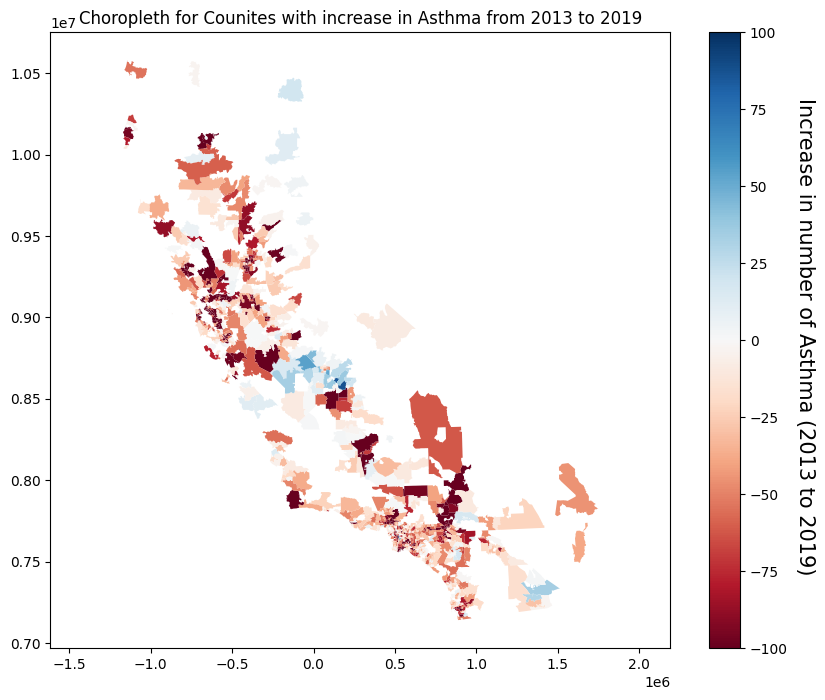

In [ ]:
# -- or perhaps let's see where there has been a increase in number of asthma 
# -- between 2013 and 2019
geoasthma["bdiff"] = geoasthma["2019_Asthma"] - geoasthma["2013_Asthma"]

fig, ax = plt.subplots(figsize=(10, 8))
geoasthma.plot("bdiff", ax=ax, cmap="RdBu", vmin=-100, vmax=100, legend=True)
ax.grid(False)
ax.set_title('Choropleth for Counites with increase in Asthma from 2013 to 2019')
ax.axis("equal")
fig.text(0.88, 0.5, "Increase in number of Asthma (2013 to 2019)", 
         fontsize=15, va="center", ha="center", rotation=-90)
fig.show()

The choropleth aboove showed that there are few counties such as Los Angeles, Imperial, Tulare, Fresno, Madera where color-coding is greater than 25 (color changing from brown to blue). Meaning these are the counties in California where there was an increasing trend for people with Asthma as compared from 2019 to 2019.  

In [ ]:
# Filter counties with color code greater than 25
high_counties = geoasthma[geoasthma['bdiff'] > 25]

# Get the county names
county_names = high_counties['County'].tolist()  # Replace 'county_name' with the column name containing county names

# Print the county names
print(county_names)

['Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Imperial', 'Imperial', 'Tulare', 'Fresno', 'Madera', 'Madera', 'Fresno', 'Fresno', 'Fresno', 'Fresno', 'Fresno', 'Fresno', 'Fresno', 'Fresno', 'Fresno']


Now looking into of asthma dataframe to merge with our aqi dataframe

In [ ]:
asthma

Year    Zip  People with Asthma  Rates per 10,000  Age       County
0      2013  90001                 240              79.9  18+  Los Angeles
1      2013  90002                 215              67.8  18+  Los Angeles
2      2013  90003                 287              73.4  18+  Los Angeles
3      2013  90004                 101              21.7  18+  Los Angeles
4      2013  90005                  76              24.3  18+  Los Angeles
...     ...    ...                 ...               ...  ...          ...
14102  2019  96101                  45             138.0  18+        Modoc
14103  2019  96122                  23              86.3  18+       Plumas
14104  2019  96130                  62              35.4  18+       Lassen
14105  2019  96150                  43              17.7  18+    El Dorado
14106  2019  96161                  18              12.2  18+       Nevada

[14107 rows x 6 columns]

In [ ]:
asthma.columns

Index(['Year', 'Zip', 'People with Asthma', 'Rates per 10,000', 'Age',
       'County'],
      dtype='object')

In [ ]:
#--to check the information about the dataframe
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14107 entries, 0 to 14106
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                14107 non-null  int64  
 1   Zip                 14107 non-null  int64  
 2   People with Asthma  14107 non-null  int64  
 3   Rates per 10,000    14107 non-null  float64
 4   Age                 14107 non-null  object 
 5   County              14107 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 661.4+ KB


In [ ]:
aqi

State     County  Year  Days with AQI  Good Days  Moderate Days  \
26162  California    Alameda  2013            365        189            168   
26163  California     Amador  2013            365        301             62   
26164  California      Butte  2013            365        147            209   
26165  California  Calaveras  2013            364        248            114   
26166  California     Colusa  2013            364        250            112   
...           ...        ...   ...            ...        ...            ...   
32211  California    Trinity  2019            269        246             21   
32212  California     Tulare  2019            365        127            157   
32213  California   Tuolumne  2019            358        273             83   
32214  California    Ventura  2019            365        214            142   
32215  California       Yolo  2019            365        284             80   

       Unhealthy for Sensitive Groups Days  Unhealthy Days  \
26162                                    8               0   
26163                                    2               0   
26164                                    8               1   
26165                                    2               0   
26166                                    2               0   
...                                    ...             ...   
32211                                    2               0   
32212                                   78               2   
32213                                    2               0   
32214                                    9               0   
32215                                    1               0   

       Very Unhealthy Days  Hazardous Days  ...  90th Percentile AQI  \
26162                    0               0  ...                   79   
26163                    0               0  ...                   61   
26164                    0               0  ...                   90   
26165                    0               0  ...                   64   
26166                    0               0  ...                   63   
...                    ...             ...  ...                  ...   
32211                    0               0  ...                   49   
32212                    1               0  ...                  122   
32213                    0               0  ...                   67   
32214                    0               0  ...                   77   
32215                    0               0  ...                   61   

       Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  Days PM2.5  \
26162          50        0        13          83         0         269   
26163          38        0         0         365         0           0   
26164          54        0         0         221         0         144   
26165          45        0         0         229         0         135   
26166          41        0         0         151         0         208   
...           ...      ...       ...         ...       ...         ...   
32211          18        0         0           0         0         269   
32212          66        0         2         242         0          99   
32213          43        0         0         358         0           0   
32214          46        0         5         284         0          65   
32215          41        0         1         279         0          82   

       Days PM10   Latitude   Longitude  
26162          0  37.654456 -122.031547  
26163          0  38.690662 -120.072754  
26164          0  39.327563 -121.668811  
26165          0  38.201850 -120.680277  
26166          5  39.189190 -121.998870  
...          ...        ...         ...  
32211          0  40.786247 -122.805707  
32212         22  36.031831 -119.055018  
32213          0  37.981780 -120.378551  
32214         11  34.252390 -119.143182  
32215          3  38.571460 -121.525790  

[371 rows x 21 columns]

In [ ]:
aqi.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
# merge two data frames based upon same values under two columns
merged_df = pd.merge(asthma, aqi, left_on=['County', 'Year'], right_on=['County', 'Year'])

# Select only the rows that match both conditions
aqi_asthma = merged_df[(merged_df['Year'] == merged_df['Year']) & (merged_df['State'] == merged_df['State'])].copy()
aqi_asthma

Year    Zip  People with Asthma  Rates per 10,000  Age       County  \
0      2013  90001                 240              79.9  18+  Los Angeles   
1      2013  90002                 215              67.8  18+  Los Angeles   
2      2013  90003                 287              73.4  18+  Los Angeles   
3      2013  90004                 101              21.7  18+  Los Angeles   
4      2013  90005                  76              24.3  18+  Los Angeles   
...     ...    ...                 ...               ...  ...          ...   
14048  2019  96020                  13              90.3  18+       Plumas   
14049  2019  96122                  23              86.3  18+       Plumas   
14050  2019  96093                  15              56.7  18+      Trinity   
14051  2019  96094                  17              36.3  18+     Siskiyou   
14052  2019  96097                  42              66.2  18+     Siskiyou   

            State  Days with AQI  Good Days  Moderate Days  ...  \
0      California            365         22            243  ...   
1      California            365         22            243  ...   
2      California            365         22            243  ...   
3      California            365         22            243  ...   
4      California            365         22            243  ...   
...           ...            ...        ...            ...  ...   
14048  California            341        248             88  ...   
14049  California            341        248             88  ...   
14050  California            269        246             21  ...   
14051  California            365        332             29  ...   
14052  California            365        332             29  ...   

       90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  \
0                      140          77        0        21         176   
1                      140          77        0        21         176   
2                      140          77        0        21         176   
3                      140          77        0        21         176   
4                      140          77        0        21         176   
...                    ...         ...      ...       ...         ...   
14048                   68          25        0         0           0   
14049                   68          25        0         0           0   
14050                   49          18        0         0           0   
14051                   49          36        0         0         262   
14052                   49          36        0         0         262   

       Days SO2  Days PM2.5  Days PM10   Latitude   Longitude  
0             0         165          3  34.813034 -118.884819  
1             0         165          3  34.813034 -118.884819  
2             0         165          3  34.813034 -118.884819  
3             0         165          3  34.813034 -118.884819  
4             0         165          3  34.813034 -118.884819  
...         ...         ...        ...        ...         ...  
14048         0         341          0  39.813360 -120.470690  
14049         0         341          0  39.813360 -120.470690  
14050         0         269          0  40.786247 -122.805707  
14051         0         103          0  41.726892 -122.633579  
14052         0         103          0  41.726892 -122.633579  

[14053 rows x 25 columns]

In [ ]:
aqi_asthma.columns

Index(['Year', 'Zip', 'People with Asthma', 'Rates per 10,000', 'Age',
       'County', 'State', 'Days with AQI', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'Latitude',
       'Longitude'],
      dtype='object')

Data transformation to plot cloropleths about Median AQI in California 

In [ ]:
#--transform the data for aqi_asthma keeping the keeping the zip code as column and creating new columns from 2013 to 2019
# Define a list of the years to include in the new dataframe
years = list(range(2013, 2020))

# Create an empty dataframe to store the aqitran data
aqitran = pd.DataFrame(columns=['Zip'] + [str(year) + '_Median_AQI' for year in years] + ['Unhealthy Days','Days NO2', 'Days PM2.5', 'Moderate Days', 'County'])

# Loop over each zip code in the original dataframe
for zip_code in aqi_asthma['Zip'].unique():
    # Select the rows for the current zip code
    rows = aqi_asthma.loc[aqi_asthma['Zip'] == zip_code]
    
    # Create a dictionary to store the aqitran data for the current zip code
    data = {'Zip': zip_code,'Unhealthy Days': rows.iloc[0]['Unhealthy Days'], 'Moderate Days': rows.iloc[0]['Moderate Days'], 'Days NO2': rows.iloc[0]['Days NO2'], 'Days PM2.5': rows.iloc[0]['Days PM2.5'], 'County': rows.iloc[0]['County']}
    
    # Loop over each year in the list of years
    for year in years:
        # Get the row for the current year and zip code
        row = rows.loc[rows['Year'] == year]
        
        # If there is a row for the current year and zip code, add the value to the dictionary
        if len(row) > 0:
            data[str(year) + '_Median_AQI'] = row.iloc[0]['Median AQI']
    
    # Add the asthmatran data for the current zip code to the asthmatran dataframe
    aqitran = aqitran.append(data, ignore_index=True)

# Drop any rows containing NaN values
aqitran.dropna(inplace=True)

<ipython-input-37-d272b128cb2c>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqitran = aqitran.append(data, ignore_index=True)
<ipython-input-37-d272b128cb2c>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqitran = aqitran.append(data, ignore_index=True)
<ipython-input-37-d272b128cb2c>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqitran = aqitran.append(data, ignore_index=True)
<ipython-input-37-d272b128cb2c>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aqitran = aqitran.append(data, ignore_index=True)
<ipython-input-37-d272b128cb2c>:26: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [ ]:
aqitran

Zip 2013_Median_AQI 2014_Median_AQI 2015_Median_AQI 2016_Median_AQI  \
0     90001              77              80              79              75   
1     90002              77              80              79              75   
2     90003              77              80              79              75   
3     90004              77              80              79              75   
4     90005              77              80              79              75   
...     ...             ...             ...             ...             ...   
1096  96019              42              43              44              41   
1097  96022              42              43              44              41   
1098  96021              43              44              45              44   
1101  96080              43              44              45              44   
1105  96097              37              37              36              27   

     2017_Median_AQI 2018_Median_AQI 2019_Median_AQI Unhealthy Days Days NO2  \
0                 77              77              71             25       21   
1                 77              77              71             25       21   
2                 77              77              71             25       21   
3                 77              77              71             25       21   
4                 77              77              71             25       21   
...              ...             ...             ...            ...      ...   
1096              44              43              42              0        0   
1097              44              43              42              0        0   
1098              40              45              41              0        0   
1101              40              45              41              0        0   
1105              26              41              36              0        0   

     Days PM2.5 Moderate Days       County  
0           165           243  Los Angeles  
1           165           243  Los Angeles  
2           165           243  Los Angeles  
3           165           243  Los Angeles  
4           165           243  Los Angeles  
...         ...           ...          ...  
1096         13            66       Shasta  
1097         13            66       Shasta  
1098         67           100       Tehama  
1101         67           100       Tehama  
1105         22            31     Siskiyou  

[1016 rows x 13 columns]

In [ ]:
aqitran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1105
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Zip              1016 non-null   object
 1   2013_Median_AQI  1016 non-null   object
 2   2014_Median_AQI  1016 non-null   object
 3   2015_Median_AQI  1016 non-null   object
 4   2016_Median_AQI  1016 non-null   object
 5   2017_Median_AQI  1016 non-null   object
 6   2018_Median_AQI  1016 non-null   object
 7   2019_Median_AQI  1016 non-null   object
 8   Unhealthy Days   1016 non-null   object
 9   Days NO2         1016 non-null   object
 10  Days PM2.5       1016 non-null   object
 11  Moderate Days    1016 non-null   object
 12  County           1016 non-null   object
dtypes: object(13)
memory usage: 111.1+ KB


In [ ]:
# -- convert zipcode to integer
geoshp['ZIP_CODE'] = geoshp["ZIP_CODE"].astype(int)

In [ ]:
# merge two data frames based upon same values under two columns
geoaqi = geoshp.merge(aqitran, left_on=['ZIP_CODE'], right_on=['Zip'])

geoaqi

OBJECTID ZIP_CODE           PO_NAME STATE  POPULATION  POP_SQMI  \
0           33    90001       Los Angeles    CA       59907  16970.82   
1           34    90002       Los Angeles    CA       53573  17281.61   
2           35    90003       Los Angeles    CA       71967  20503.42   
3           36    90004       Los Angeles    CA       63987  20508.65   
4           37    90005       Los Angeles    CA       41844  26823.08   
...        ...      ...               ...   ...         ...       ...   
1011      1670    96080         Red Bluff    CA       30008     28.09   
1012      1679    96097             Yreka    CA       10126     44.14   
1013      1699    96122           Portola    CA        4034     12.29   
1014      1719    96150  South Lake Tahoe    CA       32999    151.87   
1015      1720    96161           Truckee    CA       19416     99.57   

         SQMI    SHAPE_Leng    SHAPE_Area  \
0        3.53  4.469466e+04 -9.828050e+07   
1        3.10  4.470584e+04 -8.656244e+07   
2        3.51  5.223641e+04 -9.791987e+07   
3        3.12  4.395039e+04 -8.689358e+07   
4        1.56  4.330153e+04 -4.352816e+07   
...       ...           ...           ...   
1011  1068.13  1.557854e+06 -2.977781e+10   
1012   229.43  8.283907e+05 -6.396105e+09   
1013   328.18  8.722457e+05 -9.149186e+09   
1014   217.28  4.580447e+05 -6.057234e+09   
1015   194.99  4.951101e+05 -5.436059e+09   

                                               geometry  ... 2015_Median_AQI  \
0     POLYGON ((532456.173 7660538.070, 533148.797 7...  ...              79   
1     POLYGON ((536465.606 7649213.814, 537064.829 7...  ...              79   
2     POLYGON ((525864.950 7660430.160, 526078.120 7...  ...              79   
3     POLYGON ((519399.531 7694652.300, 519458.863 7...  ...              79   
4     POLYGON ((519577.715 7687417.247, 520187.349 7...  ...              79   
...                                                 ...  ...             ...   
1011  POLYGON ((-579813.388 10003346.179, -580689.10...  ...              45   
1012  POLYGON ((-737148.456 10573827.047, -737180.67...  ...              36   
1013  POLYGON ((-59119.592 9866731.607, -59070.734 9...  ...              50   
1014  POLYGON ((14322.233 9469012.916, 16161.006 946...  ...              44   
1015  POLYGON ((-27833.501 9644370.429, -27746.725 9...  ...              47   

     2016_Median_AQI 2017_Median_AQI 2018_Median_AQI 2019_Median_AQI  \
0                 75              77              77              71   
1                 75              77              77              71   
2                 75              77              77              71   
3                 75              77              77              71   
4                 75              77              77              71   
...              ...             ...             ...             ...   
1011              44              40              45              41   
1012              27              26              41              36   
1013              32              35              35              25   
1014              45              45              45              43   
1015              44              49              44              44   

     Unhealthy Days Days NO2 Days PM2.5 Moderate Days       County  
0                25       21        165           243  Los Angeles  
1                25       21        165           243  Los Angeles  
2                25       21        165           243  Los Angeles  
3                25       21        165           243  Los Angeles  
4                25       21        165           243  Los Angeles  
...             ...      ...        ...           ...          ...  
1011              0        0         67           100       Tehama  
1012              0        0         22            31     Siskiyou  
1013              2        0        119            39       Plumas  
1014              0        0          3           120    El Dorado  
101

In [ ]:
geoaqi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         1016 non-null   int64   
 1   ZIP_CODE         1016 non-null   object  
 2   PO_NAME          1016 non-null   object  
 3   STATE            1016 non-null   object  
 4   POPULATION       1016 non-null   int64   
 5   POP_SQMI         1016 non-null   float64 
 6   SQMI             1016 non-null   float64 
 7   SHAPE_Leng       1016 non-null   float64 
 8   SHAPE_Area       1016 non-null   float64 
 9   geometry         1016 non-null   geometry
 10  Zip              1016 non-null   object  
 11  2013_Median_AQI  1016 non-null   object  
 12  2014_Median_AQI  1016 non-null   object  
 13  2015_Median_AQI  1016 non-null   object  
 14  2016_Median_AQI  1016 non-null   object  
 15  2017_Median_AQI  1016 non-null   object  
 16  2018_Median_AQI  1016 non-null   o

In [ ]:
geoaqi['2013_Median_AQI'] = geoaqi['2013_Median_AQI'].astype(float)
geoaqi['2019_Median_AQI'] = geoaqi['2019_Median_AQI'].astype(float)

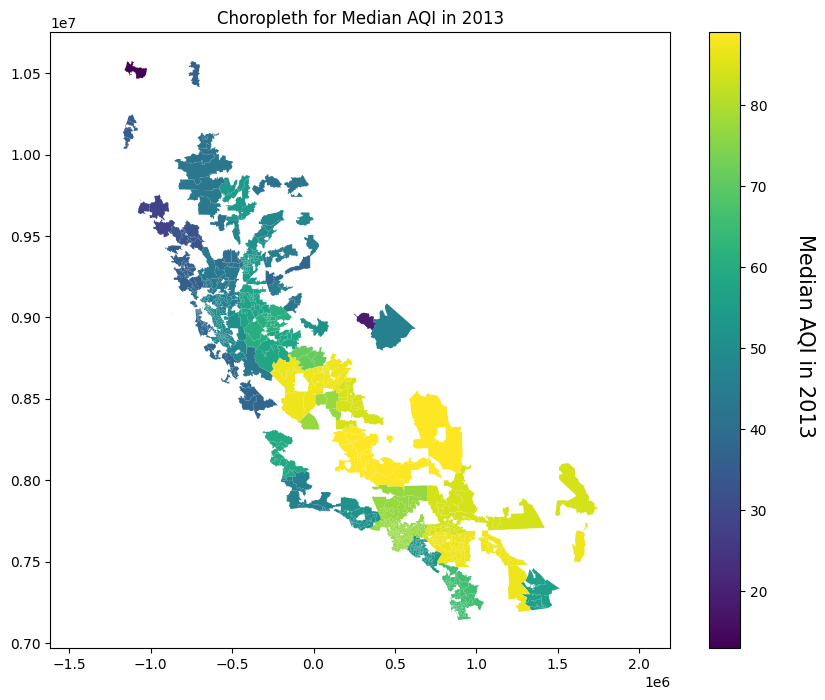

In [ ]:
# -- plot a "choropleth" of the Median AQI 2013
fig, ax = plt.subplots(figsize=(10, 8))
geoaqi.plot('2013_Median_AQI', legend =True, ax=ax)
ax.grid(False)

ax.set_title('Choropleth for Median AQI in 2013')
ax.axis("equal")
fig.text(0.88, 0.5, "Median AQI in 2013", 
         fontsize=15, va="center", ha="center", rotation=-90)

fig.show()

The choropleth aboove showed that there are few counties such as Riverside, Fresno, Los Angeles, Madera, San Bernardino, Kings, Kern, Tulare where color-coding is greater than 70 (color changing from green to yellow). Meaning these are the counties in California where AQI value was more compared to other counties in 2013. 

It looks like the Median AQI was location dependent in 2013. However, these values are not the trends over time as we want

In [ ]:
# Filter counties with color coding greater than 80
high_counties = geoaqi[geoaqi['2013_Median_AQI'] > 70]

# Print the county names separately
county_names = list(set(high_counties['County'].tolist()))
print(county_names)

['San Bernardino', 'Riverside', 'Kern', 'Kings', 'Los Angeles', 'Tulare', 'Madera', 'Fresno']


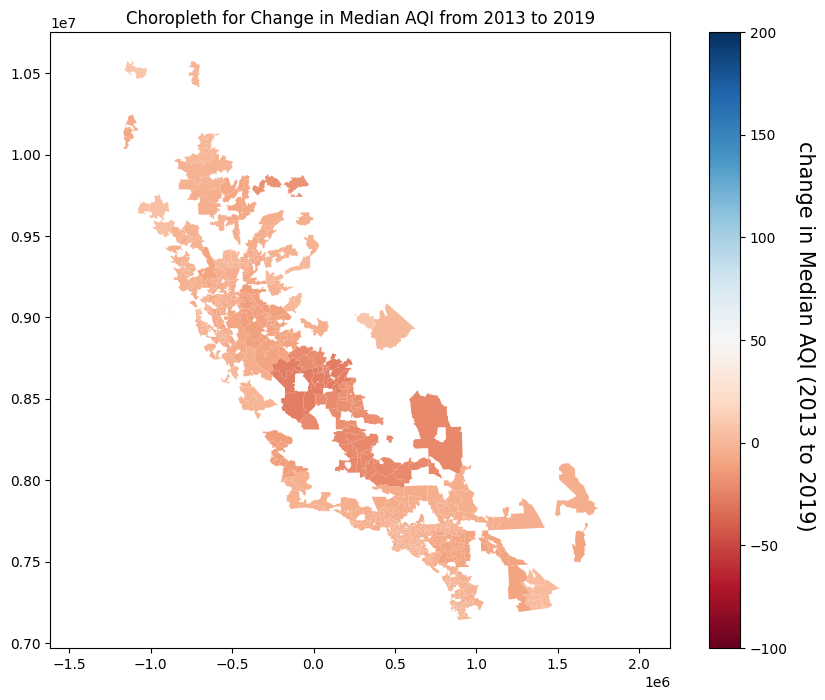

In [ ]:
# -- or perhaps let's see where there has been a increase in number of Average AQI 
# -- between 2013 and 2019
geoaqi["bdiff"] = geoaqi["2019_Median_AQI"] - geoaqi["2013_Median_AQI"]

fig, ax = plt.subplots(figsize=(10, 8))
geoaqi.plot("bdiff", ax=ax, cmap="RdBu", vmin=-100, vmax=200, legend=True)
ax.grid(False)

ax.set_title('Choropleth for Change in Median AQI from 2013 to 2019')
ax.axis("equal")
fig.text(0.88, 0.5, "change in Median AQI (2013 to 2019)", 
         fontsize=15, va="center", ha="center", rotation=-90)
fig.show()

From the choropleth above, there appear to be no plotted areas in California that are sharply increasing over time. But Conties such as Mono, Del Norte, Mendocino, Inyo, Imperial, and Amador had color coding greater than 0 and less than 50. Indicating there was very slight change in AQI in 2019 as compared to 2013.

In [ ]:
# Filter counties with color coding greater than 80
high_counties = geoaqi[geoaqi["bdiff"]  > 0]

# Print the county names separately
county_names = list(set(high_counties['County'].tolist()))
print(county_names)

['Mendocino', 'Imperial', 'Inyo', 'Del Norte', 'Mono', 'Amador']


*Clustering for Asthma*

In [ ]:
asthmatran

Zip 2013_Asthma 2014_Asthma 2015_Asthma 2016_Asthma 2017_Asthma  \
0     90001         240         222         229         205         244   
1     90002         215         231         249         236         270   
2     90003         287         342         385         383         378   
3     90004         101         108         150         157         154   
4     90005          76          80          68          65          67   
...     ...         ...         ...         ...         ...         ...   
1107  92249          33          17          16          15          23   
1111  93434          34          17          33          22          16   
1113  93609          34          21          18          13          21   
1126  95324          17          19          13          16          17   
1182  93615          13          18          29          29          15   

     2018_Asthma 2019_Asthma  Rates per 10,000   Age         County  
0            215         204              79.9   18+    Los Angeles  
1            232         218              67.8   18+    Los Angeles  
2            393         369              73.4   18+    Los Angeles  
3            162         108              21.7   18+    Los Angeles  
4             54          82              24.3   18+    Los Angeles  
...          ...         ...               ...   ...            ...  
1107          15          19              34.5   18+       Imperial  
1111          14          18              36.1   18+  Santa Barbara  
1113          17          18              59.5   18+         Fresno  
1126          15          12              36.3   18+         Merced  
1182          20          15              56.5  0-17         Tulare  

[1020 rows x 11 columns]

In [ ]:
#--dropping Rates per 10,000, Age, and County columns
asthma_timeseries = asthmatran.drop(columns=['Rates per 10,000', 'Age', 'County'])

#--making County as the index column
asthma_timeseries.set_index('Zip', inplace=True)
asthma_timeseries

2013_Asthma 2014_Asthma 2015_Asthma 2016_Asthma 2017_Asthma 2018_Asthma  \
Zip                                                                             
90001         240         222         229         205         244         215   
90002         215         231         249         236         270         232   
90003         287         342         385         383         378         393   
90004         101         108         150         157         154         162   
90005          76          80          68          65          67          54   
...           ...         ...         ...         ...         ...         ...   
92249          33          17          16          15          23          15   
93434          34          17          33          22          16          14   
93609          34          21          18          13          21          17   
95324          17          19          13          16          17          15   
93615          13          18          29          29          15          20   

      2019_Asthma  
Zip                
90001         204  
90002         218  
90003         369  
90004         108  
90005          82  
...           ...  
92249          19  
93434          18  
93609          18  
95324          12  
93615          15  

[1020 rows x 7 columns]

In [ ]:
#--dropping Rates per 10,000, Age, and County columns
asthma_timeseries = asthmatran.drop(columns=['Rates per 10,000', 'Age', 'County'])

#--making zip as the index column
asthma_timeseries.set_index('Zip', inplace=True)
asthma_timeseries

2013_Asthma 2014_Asthma 2015_Asthma 2016_Asthma 2017_Asthma 2018_Asthma  \
Zip                                                                             
90001         240         222         229         205         244         215   
90002         215         231         249         236         270         232   
90003         287         342         385         383         378         393   
90004         101         108         150         157         154         162   
90005          76          80          68          65          67          54   
...           ...         ...         ...         ...         ...         ...   
92249          33          17          16          15          23          15   
93434          34          17          33          22          16          14   
93609          34          21          18          13          21          17   
95324          17          19          13          16          17          15   
93615          13          18          29          29          15          20   

      2019_Asthma  
Zip                
90001         204  
90002         218  
90003         369  
90004         108  
90005          82  
...           ...  
92249          19  
93434          18  
93609          18  
95324          12  
93615          15  

[1020 rows x 7 columns]

In [ ]:
#--converting asthma_timeseries into float as heatmap requires float type
asthma_timeseries = asthma_timeseries.astype(float)
asthma_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 90001 to 93615
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   2013_Asthma  1020 non-null   float64
 1   2014_Asthma  1020 non-null   float64
 2   2015_Asthma  1020 non-null   float64
 3   2016_Asthma  1020 non-null   float64
 4   2017_Asthma  1020 non-null   float64
 5   2018_Asthma  1020 non-null   float64
 6   2019_Asthma  1020 non-null   float64
dtypes: float64(7)
memory usage: 63.8 KB


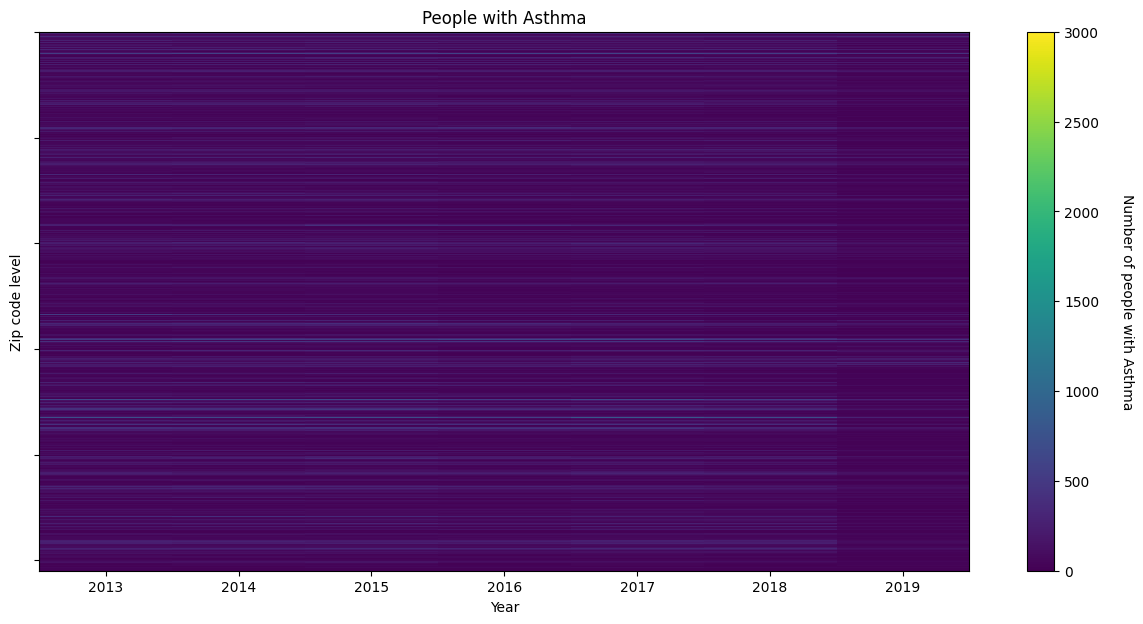

In [ ]:
#--creating a numpy array years for the values of the years between 2013 to 2019
years = np.arange(2013, 2020)
#--making a heat map of the asthma data series
#--initialize the figure
fig, ax = plt.subplots(figsize=(15,7))

#--plot all time series with a 'heatmap'
im =ax.imshow(asthma_timeseries, aspect='auto', interpolation='nearest', clim = (0, 3000))

#-- set the x-axis ticks to be years
xt = np.array([0, 1, 2, 3, 4, 5, 6])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels('')

#--set the axis label
ax.set_xlabel('Year')
ax.set_ylabel('Zip code level')

ax.set_title('People with Asthma')


#--set the colorbar and label
cbar= fig.colorbar(im)
cbar.ax.set_ylabel('Number of people with Asthma', rotation=-90)
cbar.ax.get_yaxis().labelpad = 25

fig.show()

In [ ]:
#-- standardize the data across columns 

asthma_timeseries_st = asthma_timeseries.sub(asthma_timeseries.mean(axis=1), axis =0).div(asthma_timeseries.std(axis=1), axis=0)

asthma_timeseries_st

2013_Asthma  2014_Asthma  2015_Asthma  2016_Asthma  2017_Asthma  \
Zip                                                                      
90001     1.087665    -0.044945     0.395515    -1.114632     1.339356   
90002    -1.106760    -0.257739     0.697410     0.007581     1.811750   
90003    -2.032961    -0.550594     0.608348     0.554444     0.419683   
90004    -1.227842    -0.969626     0.579668     0.837883     0.727219   
90005     0.584518     0.993681    -0.233807    -0.540679    -0.336098   
...            ...          ...          ...          ...          ...   
92249     2.044244    -0.417641    -0.571509    -0.725377     0.505566   
93434     1.458794    -0.607831     1.337227     0.000000    -0.729397   
93609     2.069748     0.107799    -0.344958    -1.099553     0.107799   
95324     0.585540     1.405296    -1.053972     0.175662     0.585540   
93615    -1.032079    -0.279521     1.376105     1.376105    -0.731056   

       2018_Asthma  2019_Asthma  
Zip                              
90001    -0.485404    -1.177555  
90002    -0.204675    -0.947568  
90003     0.823965     0.177114  
90004     1.022323    -0.969626  
90005    -1.665876     1.198262  
...            ...          ...  
92249    -0.725377    -0.109906  
93434    -0.972529    -0.486265  
93609    -0.495877    -0.344958  
95324    -0.234216    -1.463850  
93615     0.021502    -0.731056  

[1020 rows x 7 columns]

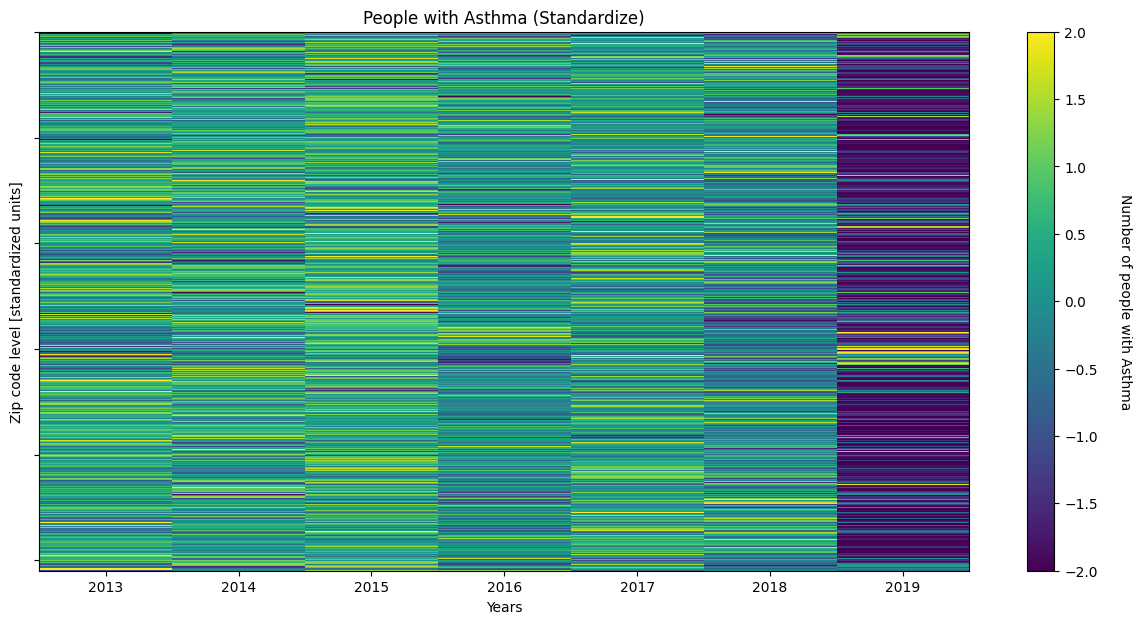

In [ ]:
#--remove rows with NaNs in teh time series if any
asthma_timeseries_st = asthma_timeseries_st.dropna()

#--start the figure
fig, ax = plt.subplots(figsize=(15,7))

#--plot the time series with a heatmap

im = ax.imshow(asthma_timeseries_st, aspect = 'auto', interpolation= 'nearest', clim=(-2,2))

#--set the x-axis ticks to be year
xt = np.array([0, 1, 2, 3, 4, 5, 6])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels('')

#--set the axis labels
ax.set_xlabel('Years')
ax.set_ylabel('Zip code level [standardized units]')

ax.set_title('People with Asthma (Standardize)')

#--set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Number of people with Asthma', rotation =-90)
cbar.ax.get_yaxis().labelpad = 25

fig.show()

The above plot shows that we sufficiently standardized the trends so that we can investigate the number of People with Asthma over time

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


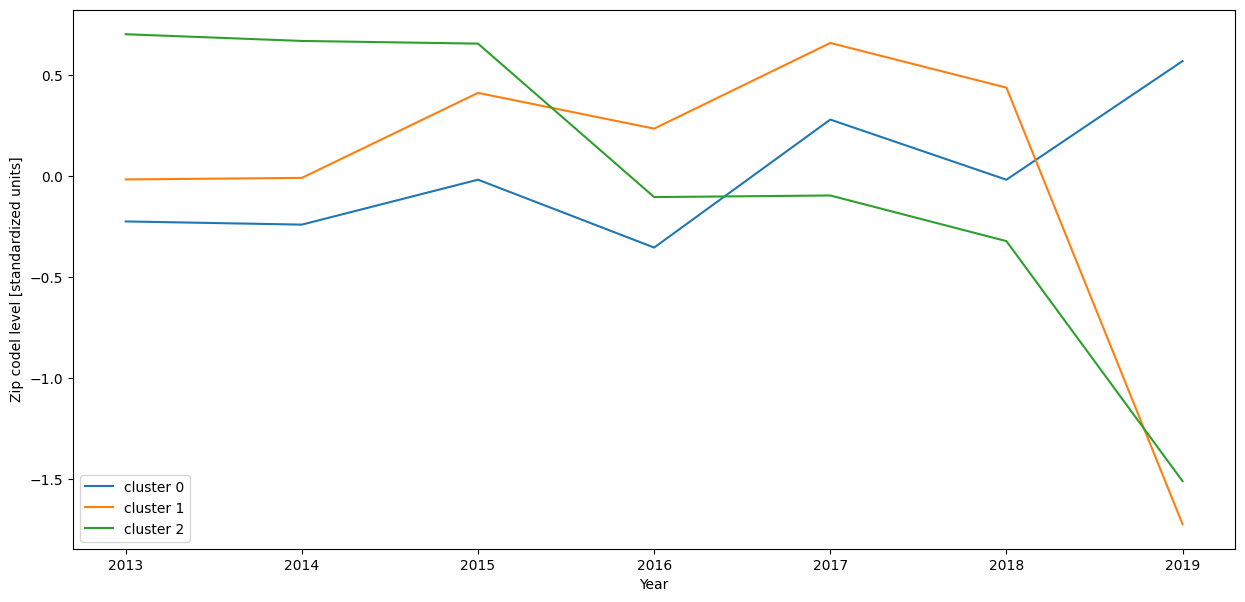

In [ ]:
#--clustering Asthma data
from sklearn.cluster import KMeans
#define the features
feat = asthma_timeseries_st

# -- cluster with 3 clusters
km = KMeans(n_clusters=3, random_state =2)
km.fit(feat)

#--plot all clsuter centers
fig, ax = plt.subplots(figsize= (15,7))
lins = ax.plot(years, km.cluster_centers_.T)
ax.set_xlabel('Year')
ax.set_ylabel('Zip codel level [standardized units]')
ax.legend(lins, ["cluster 0", "cluster 1", "cluster 2"])
fig.show()

We see the cluster trends over time for the different counties. There are 3 types of trends: 2 are predominantly decreasing, and 1 is increasing. One of the decreasing trends shows an increase in people with asthma from 2014 to 2015 and an upward trajectory until 2017. The other decreasing cluster primary decrease throughout the whole period

In [ ]:
km.labels_

array([2, 1, 0, ..., 2, 2, 1], dtype=int32)

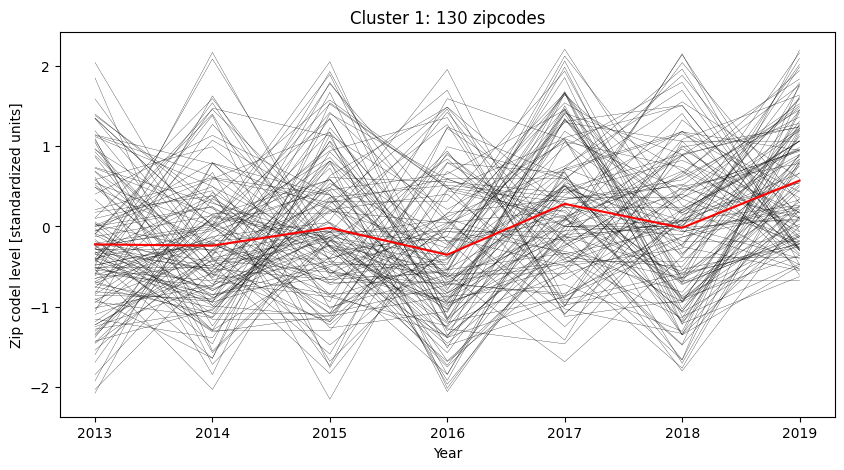

zip codes [90003 90005 90011 90013 90040 90048 90056 90059 90210 90232 90292 90401
 90405 90623 90716 91101 91105 91202 91203 91208 91361 91364 91403 91913
 91915 92009 92069 92124 92127 92130 92227 92230 92233 92241 92251 92313
 92314 92315 92359 92563 92567 92582 92584 92585 92596 92602 92629 92655
 92694 92867 92880 93036 93111 93203 93204 93215 93241 93247 93267 93280
 93405 93442 93445 93465 93610 93618 93619 93622 93625 93630 93636 93637
 93638 93640 93646 93647 93648 93654 93656 93657 93662 93702 93703 93704
 93705 93706 93721 93722 93723 93725 93727 93926 93927 93930 94043 94127
 94130 94517 94571 94598 94705 94710 94931 95006 95019 95032 95070 95130
 95134 95320 95334 95365 95367 95391 95423 95425 95457 95464 95521 95562
 95726 95811 95963 95971 96019 96022 96101 96122 96130 92249]





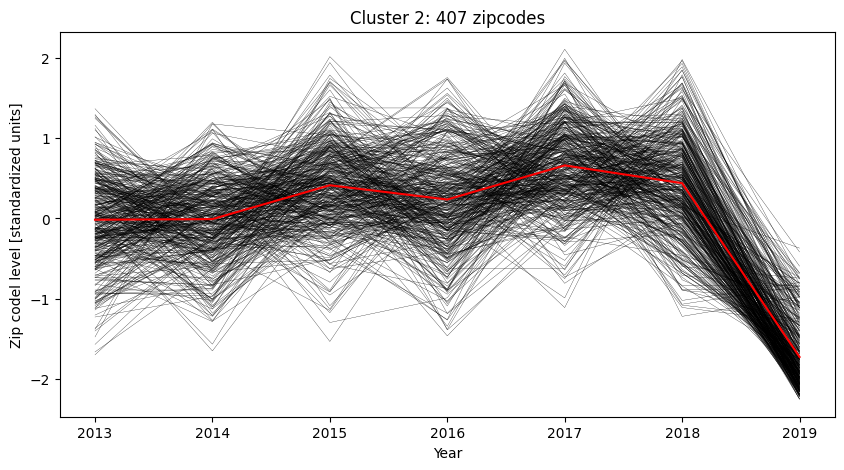

zip codes [90002 90004 90008 90012 90016 90018 90019 90020 90024 90025 90026 90027
 90028 90029 90031 90032 90034 90036 90038 90043 90044 90046 90047 90049
 90057 90061 90064 90068 90201 90212 90221 90222 90230 90240 90241 90247
 90248 90255 90260 90262 90274 90275 90278 90280 90291 90302 90304 90403
 90404 90502 90505 90602 90605 90606 90640 90670 90680 90701 90710 90712
 90720 90723 90731 90732 90745 90746 90807 90810 91010 91016 91040 91206
 91302 91303 91304 91311 91316 91324 91325 91326 91331 91335 91340 91343
 91351 91354 91355 91356 91381 91390 91401 91405 91406 91601 91605 91702
 91706 91709 91711 91722 91723 91730 91731 91733 91737 91741 91744 91745
 91746 91748 91750 91754 91755 91761 91766 91767 91768 91770 91773 91776
 91780 91789 91790 91791 91792 91801 91803 92024 92026 92037 92064 92065
 92081 92108 92110 92119 92120 92122 92123 92126 92173 92211 92220 92223
 92234 92236 92240 92250 92277 92284 92311 92320 92324 92336 92344 92346
 92374 92405 92501 92503 92505 92506 9250

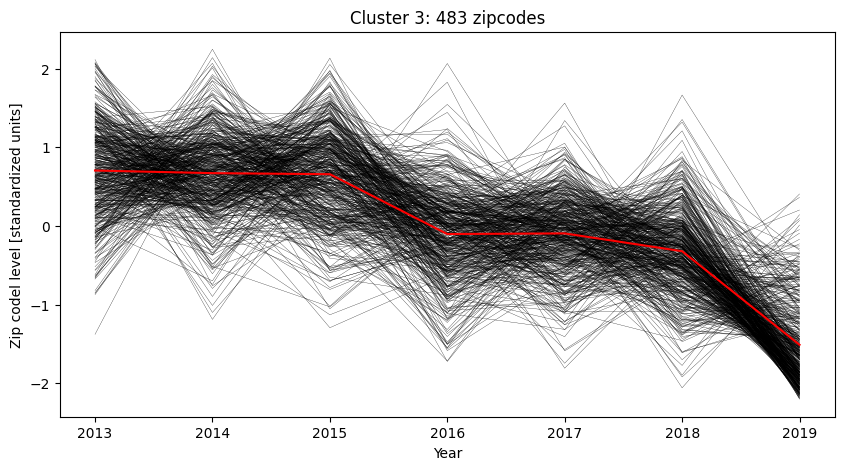

zip codes [90001 90006 90007 90014 90015 90017 90021 90022 90023 90033 90035 90037
 90039 90041 90042 90045 90062 90063 90065 90066 90069 90220 90242 90249
 90250 90266 90270 90277 90301 90303 90305 90501 90503 90504 90601 90603
 90604 90620 90621 90630 90631 90638 90650 90660 90703 90706 90713 90715
 90717 90740 90744 90755 90802 90803 90804 90805 90806 90808 90813 90814
 90815 91001 91006 91007 91030 91042 91103 91104 91106 91107 91201 91204
 91205 91214 91301 91306 91307 91320 91321 91342 91344 91345 91350 91352
 91360 91362 91367 91384 91387 91402 91411 91423 91436 91501 91502 91504
 91505 91506 91602 91604 91606 91607 91701 91710 91724 91732 91739 91740
 91752 91762 91763 91764 91765 91775 91784 91786 91901 91902 91910 91911
 91932 91941 91942 91945 91950 91977 92008 92010 92011 92019 92020 92021
 92025 92027 92028 92040 92054 92056 92057 92058 92071 92078 92082 92083
 92084 92101 92102 92103 92104 92105 92106 92107 92109 92111 92113 92114
 92115 92116 92117 92118 92128 92129 9213

In [ ]:
#--making four panel plot one ofr each cluster centers, showing the cluster center and its members. 
# -- plot each cluster individually and its members
for cnum in range(km.n_clusters):

  # -- True/False index of where label_ is cnum
  ind = km.labels_ == cnum

  # -- get the members of that cluster number
  mems = asthma_timeseries_st[ind]

  # -- make a plot
  fig, ax = plt.subplots(figsize=[10, 5])
  ax.plot(years, mems.T, lw=0.2, color="k")
  ax.plot(years, km.cluster_centers_[cnum], color="r")
  ax.set_xlabel("Year")
  ax.set_ylabel("Zip codel level [standardized units]")
  plt.title('Cluster %d: %d zipcodes' %(cnum +1, len(asthma_timeseries.index[ind].values)))


  fig.show()

  # -- refresh screen
  plt.pause(0.01)

  # -- print zip codes associated with the graph
  print("zip codes", asthma_timeseries_st.index[ind].values)
  print("\n\n")

In [ ]:
#--making choropleth of the cluster labels
#--print the labels for each objet
km.labels_

array([2, 1, 0, ..., 2, 2, 1], dtype=int32)

In [ ]:
#--adding cluster labels back to the asthma timeseries data
asthma_timeseries['labels'] = km.labels_
asthma_timeseries

2013_Asthma  2014_Asthma  2015_Asthma  2016_Asthma  2017_Asthma  \
Zip                                                                      
90001        240.0        222.0        229.0        205.0        244.0   
90002        215.0        231.0        249.0        236.0        270.0   
90003        287.0        342.0        385.0        383.0        378.0   
90004        101.0        108.0        150.0        157.0        154.0   
90005         76.0         80.0         68.0         65.0         67.0   
...            ...          ...          ...          ...          ...   
92249         33.0         17.0         16.0         15.0         23.0   
93434         34.0         17.0         33.0         22.0         16.0   
93609         34.0         21.0         18.0         13.0         21.0   
95324         17.0         19.0         13.0         16.0         17.0   
93615         13.0         18.0         29.0         29.0         15.0   

       2018_Asthma  2019_Asthma  labels  
Zip                                      
90001        215.0        204.0       2  
90002        232.0        218.0       1  
90003        393.0        369.0       0  
90004        162.0        108.0       1  
90005         54.0         82.0       0  
...            ...          ...     ...  
92249         15.0         19.0       0  
93434         14.0         18.0       2  
93609         17.0         18.0       2  
95324         15.0         12.0       2  
93615         20.0         15.0       1  

[1020 rows x 8 columns]

In [ ]:
#--California zipcode shape files
geoshp

OBJECTID  ZIP_CODE                  PO_NAME STATE  POPULATION  POP_SQMI  \
0            1        12          Mt Meadows Area    CA         -99    -99.00   
1            2        16  Sequoia National Forest    CA         -99    -99.00   
2            3        17  Northeast Fresno County    CA         -99    -99.00   
3            4        18    Los Padres Ntl Forest    CA         -99    -99.00   
4            5        19        Lassen Ntl Forest    CA         -99    -99.00   
...        ...       ...                      ...   ...         ...       ...   
1716      1717     96146           Olympic Valley    CA        1152    149.42   
1717      1718     96148              Tahoe Vista    CA        1487    991.33   
1718      1719     96150         South Lake Tahoe    CA       32999    151.87   
1719      1720     96161                  Truckee    CA       19416     99.57   
1720      1721     96162                  Truckee    CA         352    838.10   

        SQMI     SHAPE_Leng    SHAPE_Area  \
0      30.92  195388.619180 -8.621574e+08   
1      39.33  169790.572348 -1.096296e+09   
2     564.38  873109.208350 -1.573415e+10   
3      90.83  294311.333366 -2.532222e+09   
4     412.59  533289.128828 -1.150261e+10   
...      ...            ...           ...   
1716    7.71   76824.251287 -2.151139e+08   
1717    1.50   32123.269836 -4.177740e+07   
1718  217.28  458044.655793 -6.057234e+09   
1719  194.99  495110.054903 -5.436059e+09   
1720    0.42   19139.172544 -1.171002e+07   

                                               geometry  
0     POLYGON ((-235397.856 9938636.426, -235423.381...  
1     POLYGON ((463415.330 8230735.164, 481200.757 8...  
2     POLYGON ((354976.178 8923823.768, 355140.084 8...  
3     POLYGON ((355769.015 7866496.399, 355829.525 7...  
4     POLYGON ((384.567 10127749.312, 421.543 101198...  
...                                                 ...  
1716  POLYGON ((-57050.818 9560214.046, -56237.800 9...  
1717  POLYGON ((-11169.546 9568933.846, -11563.127 9...  
1718  POLYGON ((14322.233 9469012.916, 16161.006 946...  
1719  POLYGON ((-27833.501 9644370.429, -27746.725 9...  
1720  POLYGON ((-93093.240 9597550.235, -93101.474 9...  

[1721 rows x 10 columns]

In [ ]:
#--converitng zip codeo to integer
geoshp['ZIP_CODE'] = geoshp['ZIP_CODE'].astype(int)

In [ ]:
#--merging zipcodes from asthma timeseries to zipcodes from shape fiels #DataFrames and GeoDtaFrames
geoshp_asthmacluster = geoshp.merge(asthma_timeseries, left_on = 'ZIP_CODE', right_on = 'Zip') 
geoshp_asthmacluster

OBJECTID  ZIP_CODE           PO_NAME STATE  POPULATION  POP_SQMI  \
0           33     90001       Los Angeles    CA       59907  16970.82   
1           34     90002       Los Angeles    CA       53573  17281.61   
2           35     90003       Los Angeles    CA       71967  20503.42   
3           36     90004       Los Angeles    CA       63987  20508.65   
4           37     90005       Los Angeles    CA       41844  26823.08   
...        ...       ...               ...   ...         ...       ...   
1015      1680     96101           Alturas    CA        5531      9.61   
1016      1699     96122           Portola    CA        4034     12.29   
1017      1706     96130        Susanville    CA       21704     25.69   
1018      1719     96150  South Lake Tahoe    CA       32999    151.87   
1019      1720     96161           Truckee    CA       19416     99.57   

        SQMI    SHAPE_Leng    SHAPE_Area  \
0       3.53  4.469466e+04 -9.828050e+07   
1       3.10  4.470584e+04 -8.656244e+07   
2       3.51  5.223641e+04 -9.791987e+07   
3       3.12  4.395039e+04 -8.689358e+07   
4       1.56  4.330153e+04 -4.352816e+07   
...      ...           ...           ...   
1015  575.76  7.857564e+05 -1.605115e+10   
1016  328.18  8.722457e+05 -9.149186e+09   
1017  844.82  1.246027e+06 -2.355170e+10   
1018  217.28  4.580447e+05 -6.057234e+09   
1019  194.99  4.951101e+05 -5.436059e+09   

                                               geometry  2013_Asthma  \
0     POLYGON ((532456.173 7660538.070, 533148.797 7...        240.0   
1     POLYGON ((536465.606 7649213.814, 537064.829 7...        215.0   
2     POLYGON ((525864.950 7660430.160, 526078.120 7...        287.0   
3     POLYGON ((519399.531 7694652.300, 519458.863 7...        101.0   
4     POLYGON ((519577.715 7687417.247, 520187.349 7...         76.0   
...                                                 ...          ...   
1015  POLYGON ((-78483.095 10456521.105, -78227.404 ...         26.0   
1016  POLYGON ((-59119.592 9866731.607, -59070.734 9...         19.0   
1017  POLYGON ((-81757.323 10099662.990, -84190.888 ...         50.0   
1018  POLYGON ((14322.233 9469012.916, 16161.006 946...         48.0   
1019  POLYGON ((-27833.501 9644370.429, -27746.725 9...         12.0   

      2014_Asthma  2015_Asthma  2016_Asthma  2017_Asthma  2018_Asthma  \
0           222.0        229.0        205.0        244.0        215.0   
1           231.0        249.0        236.0        270.0        232.0   
2           342.0        385.0        383.0        378.0        393.0   
3           108.0        150.0        157.0        154.0        162.0   
4            80.0         68.0         65.0         67.0         54.0   
...           ...          ...          ...          ...          ...   
1015         33.0         26.0         37.0         43.0         47.0   
1016         12.0         30.0         24.0         23.0         18.0   
1017         42.0         72.0         62.0         71.0         59.0   
1018         39.0         69.0         68.0         73.0         56.0   
1019         22.0         40.0         26.0         22.0         29.0   

      2019_Asthma  labels  
0           204.0       2  
1           218.0       1  
2           369.0       0  
3           108.0       1  
4            82.0       0  
...           ...     ...  
1015         45.0       0  
1016         23.0       0  
1017         62.0       0  
1018         43.0       1  
1019         18.0       1  

[1020 rows x 18 columns]

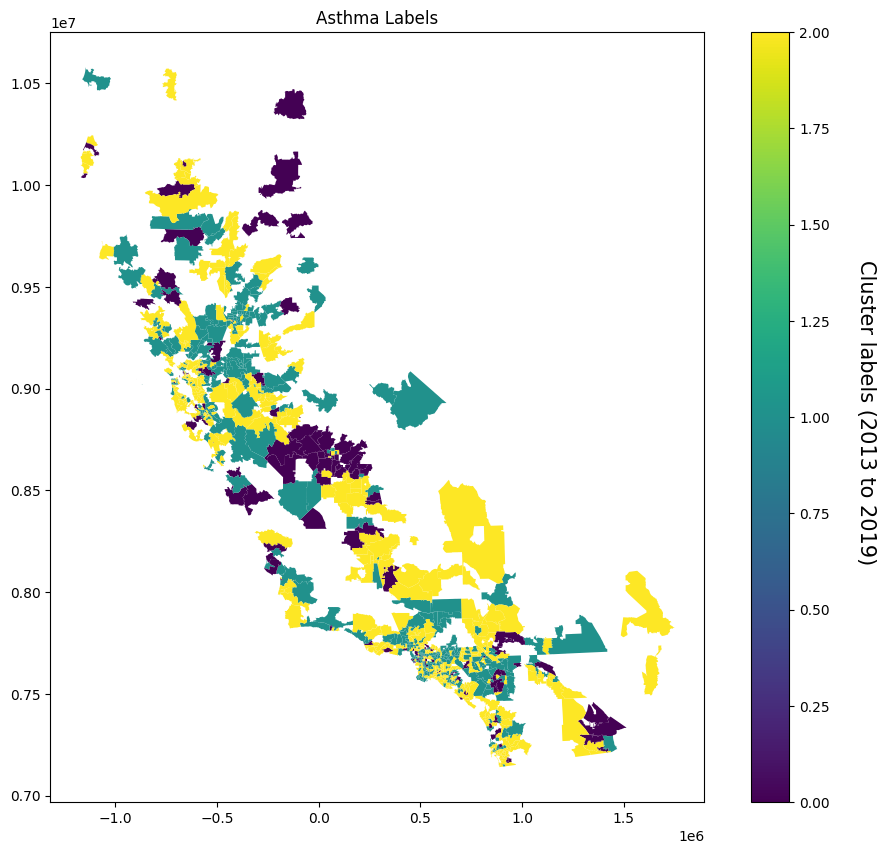

In [ ]:
#--choropleth for the number of asthma in 2019

fig, ax = plt.subplots(figsize = (12,10))

geoshp_asthmacluster.plot('labels', legend=True, cmap='viridis', ax=ax)
ax.grid(False)

ax.set_title('Asthma Labels')

fig.text(0.88, 0.5, 'Cluster labels (2013 to 2019)', 
         fontsize=15, va='center', ha='center', rotation=-90)

fig.show()

The choropleth aboove showed that there are most of the Counties in the state with color coading yellow and green indicating these counties are cluster 1 and 2 from above clustering line chart. From this choropleth and linechart we can conclude that people with Asthma decreases with time but purple color in the cohoropleth represent cluster 0 indicating there has an increase in number of people with Asthma in those Counties in the map.  

*Clustering for aqi data*

In [ ]:
aqitran

Zip 2013_Median_AQI 2014_Median_AQI 2015_Median_AQI 2016_Median_AQI  \
0     90001              77              80              79              75   
1     90002              77              80              79              75   
2     90003              77              80              79              75   
3     90004              77              80              79              75   
4     90005              77              80              79              75   
...     ...             ...             ...             ...             ...   
1096  96019              42              43              44              41   
1097  96022              42              43              44              41   
1098  96021              43              44              45              44   
1101  96080              43              44              45              44   
1105  96097              37              37              36              27   

     2017_Median_AQI 2018_Median_AQI 2019_Median_AQI Unhealthy Days Days NO2  \
0                 77              77              71             25       21   
1                 77              77              71             25       21   
2                 77              77              71             25       21   
3                 77              77              71             25       21   
4                 77              77              71             25       21   
...              ...             ...             ...            ...      ...   
1096              44              43              42              0        0   
1097              44              43              42              0        0   
1098              40              45              41              0        0   
1101              40              45              41              0        0   
1105              26              41              36              0        0   

     Days PM2.5 Moderate Days       County  
0           165           243  Los Angeles  
1           165           243  Los Angeles  
2           165           243  Los Angeles  
3           165           243  Los Angeles  
4           165           243  Los Angeles  
...         ...           ...          ...  
1096         13            66       Shasta  
1097         13            66       Shasta  
1098         67           100       Tehama  
1101         67           100       Tehama  
1105         22            31     Siskiyou  

[1016 rows x 13 columns]

In [ ]:
#--dropping Days NO2	Days PM2.5	Moderate Days columns
aqi_timeseries = aqitran.drop(columns=['Days NO2', 'Days PM2.5', 'Moderate Days', 'County', 'Unhealthy Days'])

#--making zip as the index column
aqi_timeseries.set_index('Zip', inplace=True)
aqi_timeseries

2013_Median_AQI 2014_Median_AQI 2015_Median_AQI 2016_Median_AQI  \
Zip                                                                     
90001              77              80              79              75   
90002              77              80              79              75   
90003              77              80              79              75   
90004              77              80              79              75   
90005              77              80              79              75   
...               ...             ...             ...             ...   
96019              42              43              44              41   
96022              42              43              44              41   
96021              43              44              45              44   
96080              43              44              45              44   
96097              37              37              36              27   

      2017_Median_AQI 2018_Median_AQI 2019_Median_AQI  
Zip                                                    
90001              77              77              71  
90002              77              77              71  
90003              77              77              71  
90004              77              77              71  
90005              77              77              71  
...               ...             ...             ...  
96019              44              43              42  
96022              44              43              42  
96021              40              45              41  
96080              40              45              41  
96097              26              41              36  

[1016 rows x 7 columns]

In [ ]:
#--converting aqi_timeseries into float as heatmap requires float type
aqi_timeseries = aqi_timeseries.astype(float)
aqi_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 90001 to 96097
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2013_Median_AQI  1016 non-null   float64
 1   2014_Median_AQI  1016 non-null   float64
 2   2015_Median_AQI  1016 non-null   float64
 3   2016_Median_AQI  1016 non-null   float64
 4   2017_Median_AQI  1016 non-null   float64
 5   2018_Median_AQI  1016 non-null   float64
 6   2019_Median_AQI  1016 non-null   float64
dtypes: float64(7)
memory usage: 63.5 KB


Now, We will create Heatmaps of the AQI data series

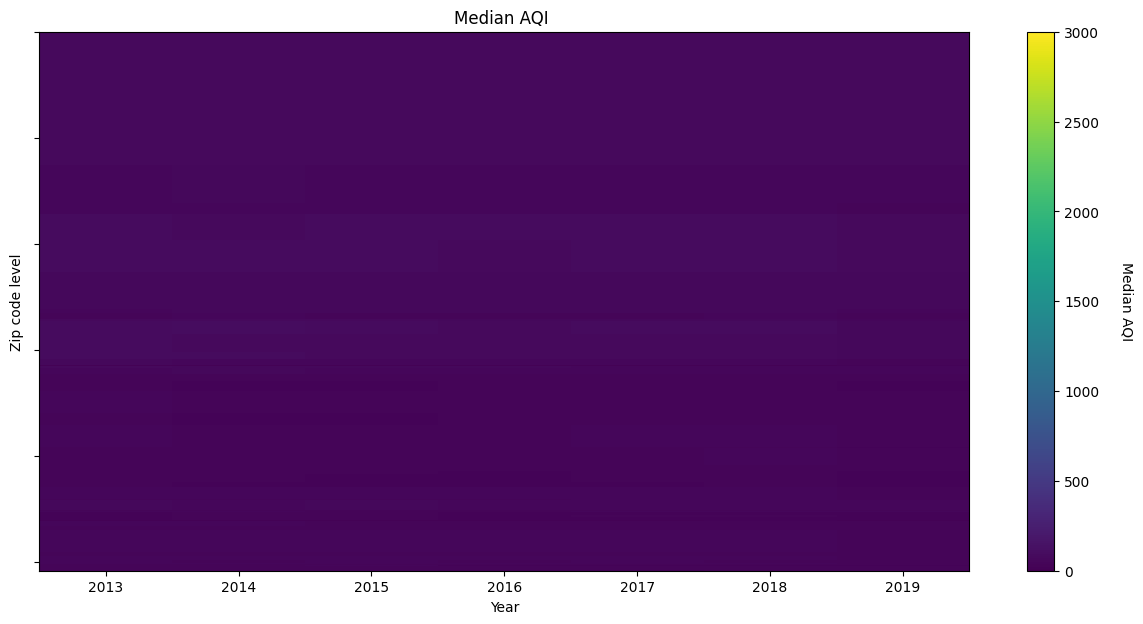

In [ ]:
#--creating a numpy array years for the values of the years between 2013 to 2019
years = np.arange(2013, 2020)
#--making a heat map of the asthma data series
#--initialize the figure
fig, ax = plt.subplots(figsize=(15,7))

#--plot all time series with a 'heatmap'
im =ax.imshow(aqi_timeseries, aspect='auto', interpolation='nearest', clim = (0, 3000))

#-- set the x-axis ticks to be years
xt = np.array([0, 1, 2, 3, 4, 5, 6])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels('')

#--set the axis label
ax.set_xlabel('Year')
ax.set_ylabel('Zip code level')

ax.set_title('Median AQI ')


#--set the colorbar and label
cbar= fig.colorbar(im)
cbar.ax.set_ylabel('Median AQI', rotation=-90)
cbar.ax.get_yaxis().labelpad = 25

fig.show()

In [ ]:
#-- standardize the data across columns 

aqi_timeseries_st = aqi_timeseries.sub(aqi_timeseries.mean(axis=1), axis =0).div(aqi_timeseries.std(axis=1), axis=0)

aqi_timeseries_st

2013_Median_AQI  2014_Median_AQI  2015_Median_AQI  2016_Median_AQI  \
Zip                                                                         
90001         0.145980         1.167841         0.827220        -0.535260   
90002         0.145980         1.167841         0.827220        -0.535260   
90003         0.145980         1.167841         0.827220        -0.535260   
90004         0.145980         1.167841         0.827220        -0.535260   
90005         0.145980         1.167841         0.827220        -0.535260   
...                ...              ...              ...              ...   
96019        -0.641941         0.256776         1.155493        -1.540658   
96022        -0.641941         0.256776         1.155493        -1.540658   
96021        -0.073193         0.439155         0.951503         0.439155   
96080        -0.073193         0.439155         0.951503         0.439155   
96097         0.485639         0.485639         0.306719        -1.303557   

       2017_Median_AQI  2018_Median_AQI  2019_Median_AQI  
Zip                                                       
90001         0.145980         0.145980        -1.897741  
90002         0.145980         0.145980        -1.897741  
90003         0.145980         0.145980        -1.897741  
90004         0.145980         0.145980        -1.897741  
90005         0.145980         0.145980        -1.897741  
...                ...              ...              ...  
96019         1.155493         0.256776        -0.641941  
96022         1.155493         0.256776        -0.641941  
96021        -1.610235         0.951503        -1.097888  
96080        -1.610235         0.951503        -1.097888  
96097        -1.482476         1.201317         0.306719  

[1016 rows x 7 columns]

In [ ]:
aqi_timeseries_st.isna().sum()

2013_Median_AQI    0
2014_Median_AQI    0
2015_Median_AQI    0
2016_Median_AQI    0
2017_Median_AQI    0
2018_Median_AQI    0
2019_Median_AQI    0
dtype: int64

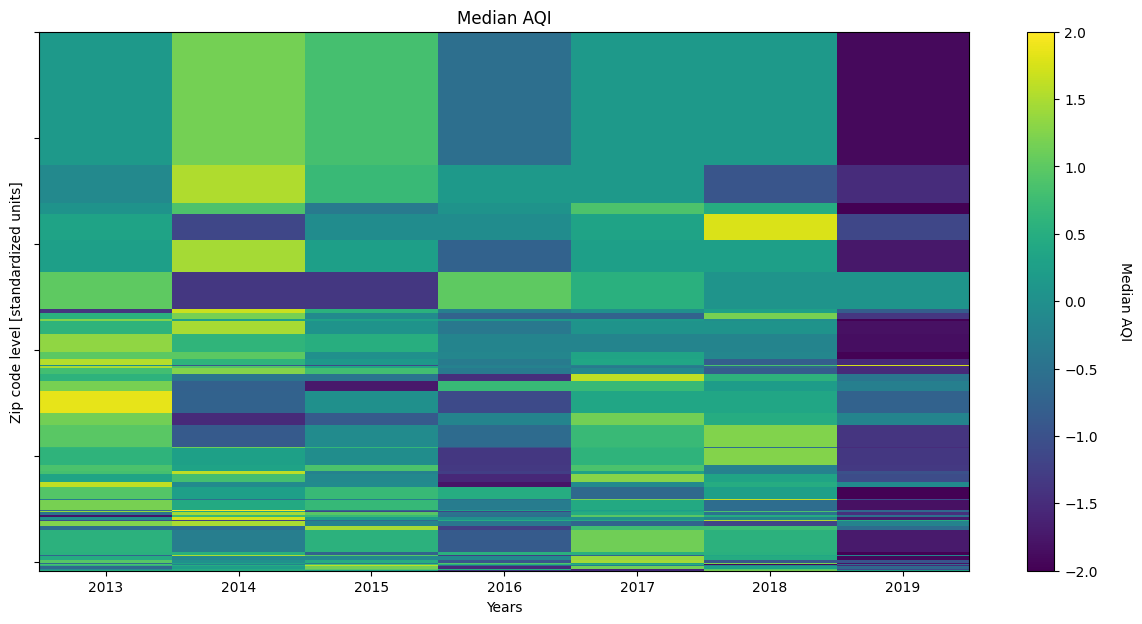

In [ ]:
#--remove rows with NaNs in the time series if any
# aqi_timeseries_st = aqi_timeseries_st.dropna()

#--replacing rows with NaNs in the time series if any with mean value of the corresponding columns
aqi_timeseries_st = aqi_timeseries_st.fillna(aqi_timeseries_st.mean())

#--converting dataframe to float
aqi_timeseries_st = aqi_timeseries_st.astype(float)

#--start the figure
fig, ax = plt.subplots(figsize=(15,7))

#--plot the time series with a heatmap

im = ax.imshow(aqi_timeseries_st, aspect = 'auto', interpolation= 'nearest', clim=(-2,2))

#--set the x-axis ticks to be year
xt = np.array([0, 1, 2, 3, 4, 5, 6])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels('')

#--set the axis labels
ax.set_xlabel('Years')
ax.set_ylabel('Zip code level [standardized units]')

ax.set_title('Median AQI')

#--set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Median AQI', rotation =-90)
cbar.ax.get_yaxis().labelpad = 25

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


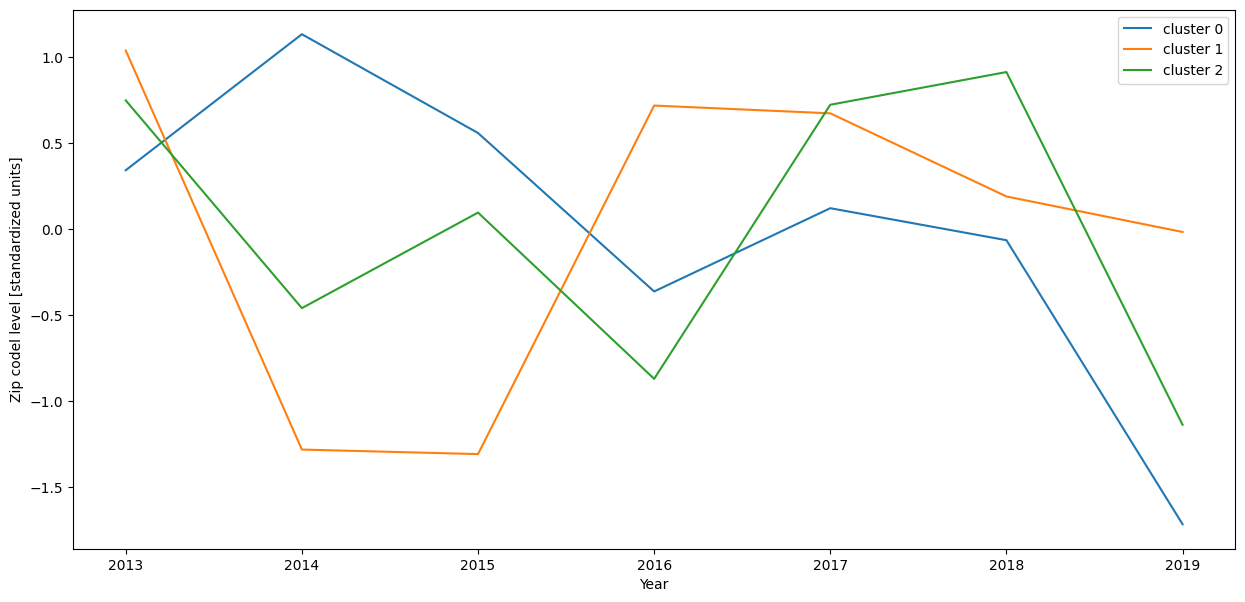

In [ ]:
#--clustering aqi data
from sklearn.cluster import KMeans
#define the features
feat = aqi_timeseries_st

# -- cluster with 3 clusters
km = KMeans(n_clusters=3, random_state =2)
km.fit(feat)

#--plot all clsuter centers
fig, ax = plt.subplots(figsize= (15,7))
lins = ax.plot(years, km.cluster_centers_.T)
ax.set_xlabel('Year')
ax.set_ylabel('Zip codel level [standardized units]')
ax.legend(lins, ["cluster 0", "cluster 1", "cluster 2"])
fig.show()


With above graph we can have a fair look of incresing and decresing trends among different clusters.

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

Now we will make four panel plot one for each cluster centers, showing the cluster center and its members. 

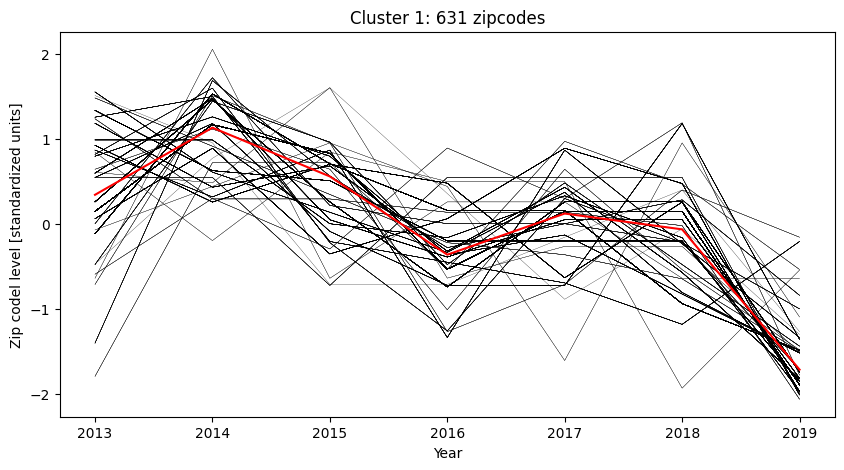

zip codes [90001 90002 90003 90004 90005 90006 90007 90008 90011 90012 90013 90014
 90015 90016 90017 90018 90019 90020 90021 90022 90023 90024 90025 90026
 90027 90028 90029 90031 90032 90033 90034 90035 90036 90037 90038 90039
 90040 90041 90042 90043 90044 90045 90046 90047 90048 90049 90056 90057
 90059 90061 90062 90063 90064 90065 90066 90068 90069 90201 90210 90212
 90220 90221 90222 90230 90232 90240 90241 90242 90247 90248 90249 90250
 90255 90260 90262 90266 90270 90274 90275 90277 90278 90280 90291 90292
 90301 90302 90303 90304 90305 90401 90403 90404 90405 90501 90502 90503
 90504 90505 90601 90602 90603 90604 90605 90606 90638 90640 90650 90660
 90670 90701 90703 90706 90710 90712 90713 90715 90716 90717 90723 90731
 90732 90744 90745 90746 90755 90802 90803 90804 90805 90806 90807 90808
 90810 90813 90814 90815 91001 91006 91007 91010 91016 91030 91040 91042
 91101 91103 91104 91105 91106 91107 91201 91202 91203 91204 91205 91206
 91208 91214 91301 91302 91303 91304 9130

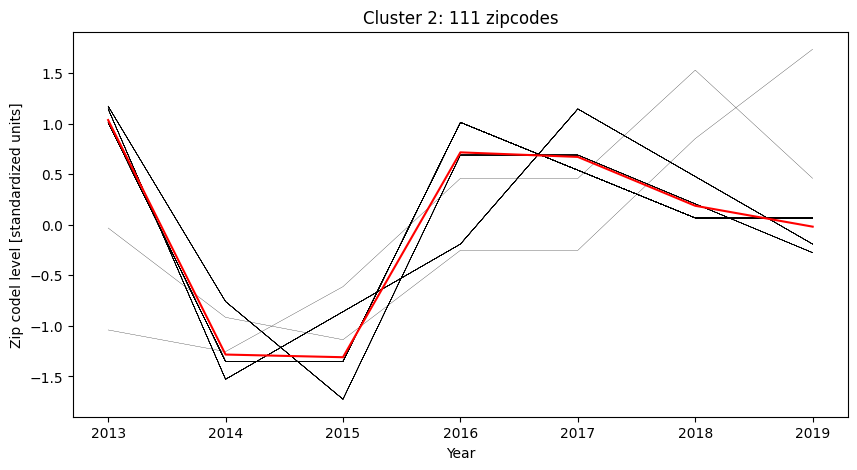

zip codes [91901 91902 91910 91911 91913 91915 91932 91941 91942 91945 91950 91977
 92008 92009 92010 92011 92019 92020 92021 92024 92025 92026 92027 92028
 92037 92040 92054 92056 92057 92058 92064 92065 92069 92071 92078 92081
 92082 92083 92084 92101 92102 92103 92104 92105 92106 92107 92108 92109
 92110 92111 92113 92114 92115 92116 92117 92118 92119 92120 92122 92123
 92124 92126 92127 92128 92129 92130 92131 92139 92154 92173 93546 94002
 94010 94014 94015 94019 94025 94030 94044 94061 94062 94063 94066 94070
 94080 94401 94402 94403 94404 94102 94103 94107 94108 94109 94110 94112
 94114 94115 94116 94117 94118 94121 94122 94124 94127 94130 94131 94132
 94133 94134 95531]





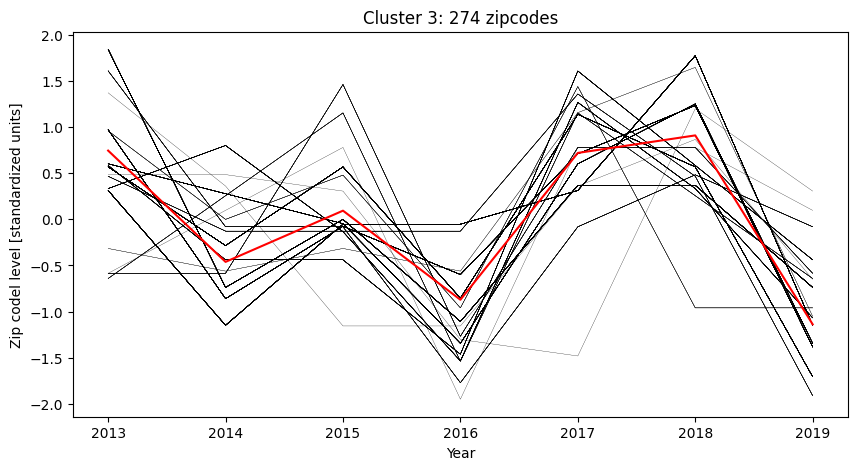

zip codes [91701 91709 91710 91730 91737 91739 91761 91762 91763 91764 91784 91786
 92252 92277 92284 92301 92307 92308 92311 92313 92314 92315 92316 92324
 92325 92335 92336 92337 92344 92345 92346 92354 92356 92359 92363 92371
 92373 92374 92376 92377 92392 92394 92395 92399 92404 92405 92407 92408
 92410 92411 93514 93901 93905 93906 93907 93926 93927 93930 93933 93940
 93950 93955 93960 95012 94040 94043 94085 94086 94087 94089 94303 95008
 95014 95020 95032 95035 95037 95050 95051 95054 95070 95110 95111 95112
 95116 95117 95118 95119 95120 95121 95122 95123 95124 95125 95126 95127
 95128 95129 95130 95131 95132 95133 95134 95135 95136 95138 95148 94501
 94502 94536 94538 94539 94541 94542 94544 94545 94546 94550 94551 94552
 94555 94560 94566 94568 94577 94578 94579 94580 94587 94601 94602 94603
 94605 94606 94607 94608 94609 94610 94611 94612 94619 94621 94702 94703
 94704 94705 94706 94709 94710 94505 94506 94507 94509 94513 94517 94518
 94519 94520 94521 94523 94526 94530 9453

In [ ]:

# -- plot each cluster individually and its members
for cnum in range(km.n_clusters):

  # -- True/False index of where label_ is cnum
  ind = km.labels_ == cnum

  # -- get the members of that cluster number
  mems = aqi_timeseries_st[ind]

  # -- make a plot
  fig, ax = plt.subplots(figsize=[10, 5])
  ax.plot(years, mems.T, lw=0.2, color="k")
  ax.plot(years, km.cluster_centers_[cnum], color="r")
  ax.set_xlabel("Year")
  ax.set_ylabel("Zip codel level [standardized units]")
  plt.title('Cluster %d: %d zipcodes' %(cnum +1, len(aqi_timeseries_st.index[ind].values)))


  fig.show()

  # -- refresh screen
  plt.pause(0.01)

  # -- print zip codes associated with the graph
  print("zip codes", aqi_timeseries_st.index[ind].values)
  print("\n\n")

In [ ]:
#--making choropleth of the cluster labels
#--print the labels for each objet
km.labels_

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
#--adding cluster labels back to the aqi timeseries data
aqi_timeseries['labels'] = km.labels_
aqi_timeseries

2013_Median_AQI  2014_Median_AQI  2015_Median_AQI  2016_Median_AQI  \
Zip                                                                         
90001             77.0             80.0             79.0             75.0   
90002             77.0             80.0             79.0             75.0   
90003             77.0             80.0             79.0             75.0   
90004             77.0             80.0             79.0             75.0   
90005             77.0             80.0             79.0             75.0   
...                ...              ...              ...              ...   
96019             42.0             43.0             44.0             41.0   
96022             42.0             43.0             44.0             41.0   
96021             43.0             44.0             45.0             44.0   
96080             43.0             44.0             45.0             44.0   
96097             37.0             37.0             36.0             27.0   

       2017_Median_AQI  2018_Median_AQI  2019_Median_AQI  labels  
Zip                                                               
90001             77.0             77.0             71.0       0  
90002             77.0             77.0             71.0       0  
90003             77.0             77.0             71.0       0  
90004             77.0             77.0             71.0       0  
90005             77.0             77.0             71.0       0  
...                ...              ...              ...     ...  
96019             44.0             43.0             42.0       2  
96022             44.0             43.0             42.0       2  
96021             40.0             45.0             41.0       0  
96080             40.0             45.0             41.0       0  
96097             26.0             41.0             36.0       2  

[1016 rows x 8 columns]

In [ ]:
#--merging zipcodes from aqi timeseries to zipcodes from shape fiels #DataFrames and GeoDtaFrames
geoshp_aqicluster = geoshp.merge(aqi_timeseries, left_on = 'ZIP_CODE', right_on = 'Zip') 
geoshp_aqicluster

OBJECTID  ZIP_CODE           PO_NAME STATE  POPULATION  POP_SQMI  \
0           33     90001       Los Angeles    CA       59907  16970.82   
1           34     90002       Los Angeles    CA       53573  17281.61   
2           35     90003       Los Angeles    CA       71967  20503.42   
3           36     90004       Los Angeles    CA       63987  20508.65   
4           37     90005       Los Angeles    CA       41844  26823.08   
...        ...       ...               ...   ...         ...       ...   
1011      1670     96080         Red Bluff    CA       30008     28.09   
1012      1679     96097             Yreka    CA       10126     44.14   
1013      1699     96122           Portola    CA        4034     12.29   
1014      1719     96150  South Lake Tahoe    CA       32999    151.87   
1015      1720     96161           Truckee    CA       19416     99.57   

         SQMI    SHAPE_Leng    SHAPE_Area  \
0        3.53  4.469466e+04 -9.828050e+07   
1        3.10  4.470584e+04 -8.656244e+07   
2        3.51  5.223641e+04 -9.791987e+07   
3        3.12  4.395039e+04 -8.689358e+07   
4        1.56  4.330153e+04 -4.352816e+07   
...       ...           ...           ...   
1011  1068.13  1.557854e+06 -2.977781e+10   
1012   229.43  8.283907e+05 -6.396105e+09   
1013   328.18  8.722457e+05 -9.149186e+09   
1014   217.28  4.580447e+05 -6.057234e+09   
1015   194.99  4.951101e+05 -5.436059e+09   

                                               geometry  2013_Median_AQI  \
0     POLYGON ((532456.173 7660538.070, 533148.797 7...             77.0   
1     POLYGON ((536465.606 7649213.814, 537064.829 7...             77.0   
2     POLYGON ((525864.950 7660430.160, 526078.120 7...             77.0   
3     POLYGON ((519399.531 7694652.300, 519458.863 7...             77.0   
4     POLYGON ((519577.715 7687417.247, 520187.349 7...             77.0   
...                                                 ...              ...   
1011  POLYGON ((-579813.388 10003346.179, -580689.10...             43.0   
1012  POLYGON ((-737148.456 10573827.047, -737180.67...             37.0   
1013  POLYGON ((-59119.592 9866731.607, -59070.734 9...             42.0   
1014  POLYGON ((14322.233 9469012.916, 16161.006 946...             45.0   
1015  POLYGON ((-27833.501 9644370.429, -27746.725 9...             48.0   

      2014_Median_AQI  2015_Median_AQI  2016_Median_AQI  2017_Median_AQI  \
0                80.0             79.0             75.0             77.0   
1                80.0             79.0             75.0             77.0   
2                80.0             79.0             75.0             77.0   
3                80.0             79.0             75.0             77.0   
4                80.0             79.0             75.0             77.0   
...               ...              ...              ...              ...   
1011             44.0             45.0             44.0             40.0   
1012             37.0             36.0             27.0             26.0   
1013             41.0             50.0             32.0             35.0   
1014             45.0             44.0             45.0             45.0   
1015             46.0             47.0             44.0             49.0   

      2018_Median_AQI  2019_Median_AQI  labels  
0                77.0             71.0       0  
1                77.0             71.0       0  
2                77.0             71.0       0  
3                77.0             71.0       0  
4                77.0             71.0       0  
...               ...              ...     ...  
1011             45.0             41.0       0  
1012             41.0             36.0       2  
1013             35.0             25.0       0  
1014             45.0             43.0       0  
1015             44.0             44.0       2  

[1016 rows x 18 columns]

Creation of choropleth for the number of asthma in 2019

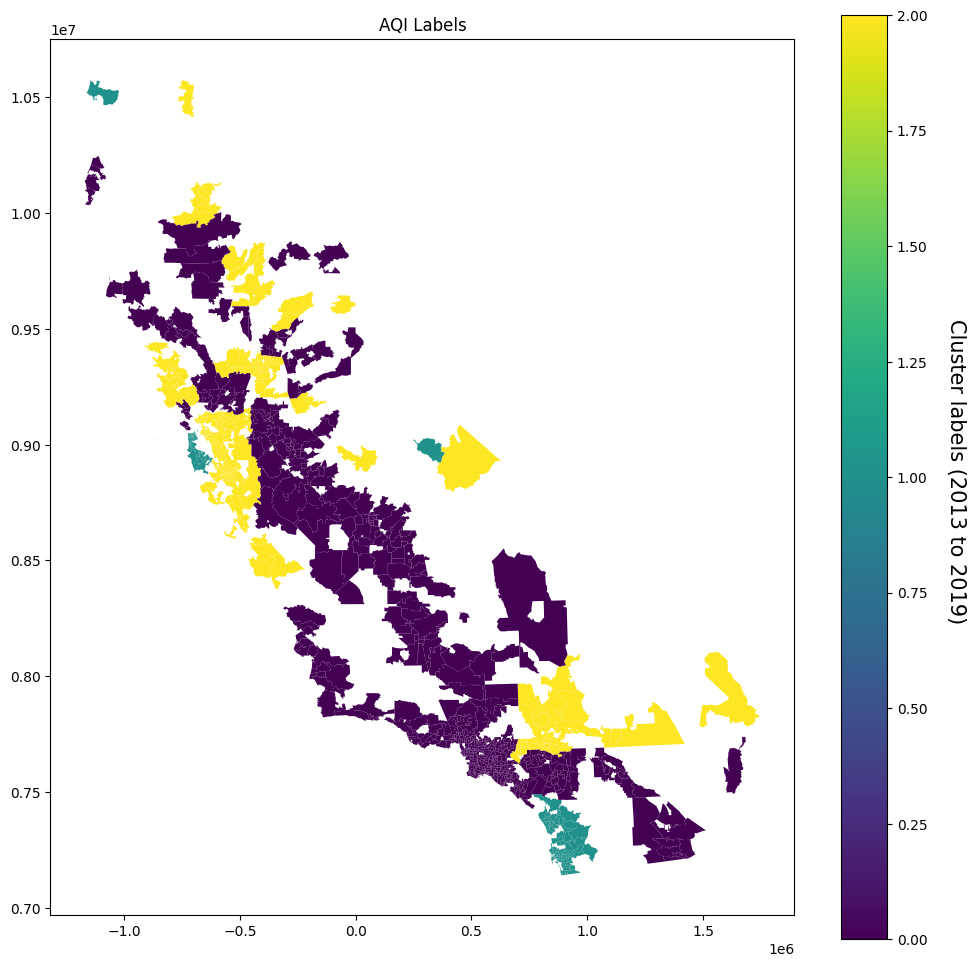

In [ ]:
#--choropleth fo the number of asthma in 2019

fig, ax = plt.subplots(figsize = (12,12))

geoshp_aqicluster.plot('labels', legend=True, cmap='viridis', ax=ax)
ax.grid(False)

ax.set_title('AQI Labels')

fig.text(0.88, 0.5, 'Cluster labels (2013 to 2019)', 
         fontsize=15, va='center', ha='center', rotation=-90)

fig.show()

The choropleth aboove showed that there are most of the Counties in the state with color coading purple and yellow indicating these counties are cluster 1 and 3 from above clustering line chart. From this choropleth and linechart we can conclude that Median AQI decreases with time. 

For counties with light green color in the cohoropleth represent cluster 2 indicating there has an decreased as well as an increase in number Median AQI value with time as can be seen in line chart.  

*fitting a linear regression*

In [ ]:
aqi_asthma

Year    Zip  People with Asthma  Rates per 10,000  Age       County  \
0      2013  90001                 240              79.9  18+  Los Angeles   
1      2013  90002                 215              67.8  18+  Los Angeles   
2      2013  90003                 287              73.4  18+  Los Angeles   
3      2013  90004                 101              21.7  18+  Los Angeles   
4      2013  90005                  76              24.3  18+  Los Angeles   
...     ...    ...                 ...               ...  ...          ...   
14048  2019  96020                  13              90.3  18+       Plumas   
14049  2019  96122                  23              86.3  18+       Plumas   
14050  2019  96093                  15              56.7  18+      Trinity   
14051  2019  96094                  17              36.3  18+     Siskiyou   
14052  2019  96097                  42              66.2  18+     Siskiyou   

            State  Days with AQI  Good Days  Moderate Days  ...  \
0      California            365         22            243  ...   
1      California            365         22            243  ...   
2      California            365         22            243  ...   
3      California            365         22            243  ...   
4      California            365         22            243  ...   
...           ...            ...        ...            ...  ...   
14048  California            341        248             88  ...   
14049  California            341        248             88  ...   
14050  California            269        246             21  ...   
14051  California            365        332             29  ...   
14052  California            365        332             29  ...   

       90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  \
0                      140          77        0        21         176   
1                      140          77        0        21         176   
2                      140          77        0        21         176   
3                      140          77        0        21         176   
4                      140          77        0        21         176   
...                    ...         ...      ...       ...         ...   
14048                   68          25        0         0           0   
14049                   68          25        0         0           0   
14050                   49          18        0         0           0   
14051                   49          36        0         0         262   
14052                   49          36        0         0         262   

       Days SO2  Days PM2.5  Days PM10   Latitude   Longitude  
0             0         165          3  34.813034 -118.884819  
1             0         165          3  34.813034 -118.884819  
2             0         165          3  34.813034 -118.884819  
3             0         165          3  34.813034 -118.884819  
4             0         165          3  34.813034 -118.884819  
...         ...         ...        ...        ...         ...  
14048         0         341          0  39.813360 -120.470690  
14049         0         341          0  39.813360 -120.470690  
14050         0         269          0  40.786247 -122.805707  
14051         0         103          0  41.726892 -122.633579  
14052         0         103          0  41.726892 -122.633579  

[14053 rows x 25 columns]

In [ ]:
#--taking only useful columns
aqi_asthma = aqi_asthma[['State', 'Year', 'County', 'Zip', 'Unhealthy Days', 'Days NO2', 'Days Ozone',
                  'Days SO2', 'Days CO', 'Days PM2.5', 'Days PM10', 'Moderate Days', 'Median AQI',
                  'Rates per 10,000', 'People with Asthma']]
aqi_asthma

State  Year       County    Zip  Unhealthy Days  Days NO2  \
0      California  2013  Los Angeles  90001              25        21   
1      California  2013  Los Angeles  90002              25        21   
2      California  2013  Los Angeles  90003              25        21   
3      California  2013  Los Angeles  90004              25        21   
4      California  2013  Los Angeles  90005              25        21   
...           ...   ...          ...    ...             ...       ...   
14048  California  2019       Plumas  96020               0         0   
14049  California  2019       Plumas  96122               0         0   
14050  California  2019      Trinity  96093               0         0   
14051  California  2019     Siskiyou  96094               2         0   
14052  California  2019     Siskiyou  96097               2         0   

       Days Ozone  Days SO2  Days CO  Days PM2.5  Days PM10  Moderate Days  \
0             176         0        0         165          3            243   
1             176         0        0         165          3            243   
2             176         0        0         165          3            243   
3             176         0        0         165          3            243   
4             176         0        0         165          3            243   
...           ...       ...      ...         ...        ...            ...   
14048           0         0        0         341          0             88   
14049           0         0        0         341          0             88   
14050           0         0        0         269          0             21   
14051         262         0        0         103          0             29   
14052         262         0        0         103          0             29   

       Median AQI  Rates per 10,000  People with Asthma  
0              77              79.9                 240  
1              77              67.8                 215  
2              77              73.4                 287  
3              77              21.7                 101  
4              77              24.3                  76  
...           ...               ...                 ...  
14048          25              90.3                  13  
14049          25              86.3                  23  
14050          18              56.7                  15  
14051          36              36.3                  17  
14052          36              66.2                  42  

[14053 rows x 15 columns]

In [ ]:
aqi_asthma.columns

Index(['State', 'Year', 'County', 'Zip', 'Unhealthy Days', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days CO', 'Days PM2.5', 'Days PM10',
       'Moderate Days', 'Median AQI', 'Rates per 10,000',
       'People with Asthma'],
      dtype='object')

<ipython-input-81-1df17f3349ac>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = aqi_asthma.corr()


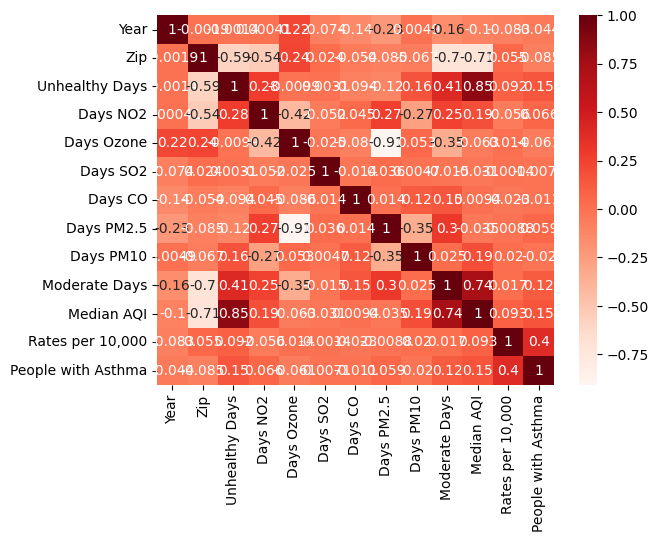

In [ ]:
#Created correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

corr = aqi_asthma.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Linear Regression Model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


# Select the independent and dependent variables
X = aqi_asthma.iloc[:,4:-1].values
y = aqi_asthma.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the LinearRegression class
regressor = LinearRegression()

# Fit the training data to the model
regressor.fit(X_train, y_train)

# Predict the values of the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model using performance metrics
mse = np.mean((y_pred - y_test)**2)
r2_score = regressor.score(X_test, y_test)

print("Mean squared error:", mse)
print("R-squared score:", r2_score)

Mean squared error: 5618.566915518277
R-squared score: 0.17423190510516173


Linear regression assumes a linear relationship between the independent variables and the target variable.
It estimates the coefficients (slope and intercept) that minimize the sum of squared differences between the predicted and actual values.
However, It may not capture non-linear relationships or interactions between variables effectively. The mean squared error (MSE) and R-squared score are common evaluation metrics for regression models. A low value of MSE indicates that the model is able to predict the target variable with high accuracy, while a high R-squared score indicates that a larger proportion of the variance in the target variable is explained by the independent variables.

The R-squared score of 0.1742 indicates that only 17.42% of the variance in the target variable is explained by the independent variables, which is relatively low. This suggests that there may be other variables that are important predictors of the target variable that are not included in the model.


In [ ]:
#Decision Tree Regression:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = np.mean((y_pred - y_test)**2)
r2_score = regressor.score(X_test, y_test)

print("Mean squared error:", mse)
print("R-squared score:", r2_score)


Mean squared error: 10552.40335833432
R-squared score: -0.5509004607040138


Decision trees are a simple yet powerful model that can capture non-linear relationships and interactions between features.
They partition the feature space into regions based on feature values, and each partition represents a decision or prediction.

However, decision trees are prone to overfitting, meaning they may fit the training data too closely and not generalize well to new data.


In [ ]:
#Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = np.mean((y_pred - y_test)**2)
r2_score = regressor.score(X_test, y_test)

print("Mean squared error:", mse)
print("R-squared score:", r2_score)

Mean squared error: 6287.187128265736
R-squared score: 0.07596392190045864


Random forests are an ensemble of decision trees that work by aggregating the predictions of multiple trees.
Each tree in the forest is trained on a random subset of the training data and a random subset of features.
By combining the predictions of multiple trees, random forests can reduce overfitting and improve generalization performance.


In [ ]:
#Gradient Boosting Regression:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = np.mean((y_pred - y_test)**2)
r2_score = regressor.score(X_test, y_test)

print("Mean squared error:", mse)
print("R-squared score:", r2_score)

Mean squared error: 5258.258171708983
R-squared score: 0.2271869503013988


Gradient boosting is also an ensemble technique, but it works by sequentially adding new models that correct the mistakes made by the previous models.
Each new model is trained to minimize the residuals (the differences between the predicted and actual values) of the previous models.
It is a powerful technique that often achieves high predictive performance.
However, gradient boosting needs hyperparameter tuning to optimize its performance.


In [ ]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

# Select the independent and dependent variables
X = aqi_asthma.iloc[:,4:-1].values
y = aqi_asthma.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid for each algorithm
lr_params = {'fit_intercept': [True, False]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
gb_params = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}

# Define the models and hyperparameters grid to search
models = {
    'Linear Regression': (LinearRegression(), lr_params),
    'Random Forest Regression': (RandomForestRegressor(), rf_params),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), gb_params)
}

# Train and evaluate each model
best_model = None
best_r2 = -1
for model_name, (model, params) in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(model, params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared for {model_name}: {r2}')
    if r2 > best_r2:
        best_model = grid_search
        best_r2 = r2

# Print the best model's name and parameters
print(f'Best Model: {best_model.best_estimator_}')
print(f'Best Parameters: {best_model.best_params_}')


Training Linear Regression...
R-squared for Linear Regression: 0.19450980840482757
Training Random Forest Regression...
R-squared for Random Forest Regression: 0.22367764400957346
Training Gradient Boosting Regression...
R-squared for Gradient Boosting Regression: 0.22276713958278693
Best Model: RandomForestRegressor(max_depth=5, n_estimators=200)
Best Parameters: {'max_depth': 5, 'n_estimators': 200}


Tuning hyperparameters is an important step in optimizing the performance of a machine learning model. GridSearchCV is a technique that allows us to systematically search for the best combination of hyperparameters by evaluating the model's performance on a specified metric. we define a dictionary of models and their respective hyperparameters grid to search. We then train and evaluate each model using the GridSearchCV function, which performs a search over a specified parameter grid, cross-validating the results. The R-squared score is used as the evaluation metric for selecting the best model among themselves.


Here we started removing features to see if the model predictions improve

In [ ]:
# Define the input and target variables
X = aqi_asthma[['Unhealthy Days', 'Days NO2','Days PM2.5','Days PM10','Days SO2', 'Moderate Days', 'Median AQI']]
y = aqi_asthma['People with Asthma']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid for each algorithm
lr_params = {'fit_intercept': [True, False]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
gb_params = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}

# Define the models and hyperparameters grid to search
models = {
    'Linear Regression': (LinearRegression(), lr_params),
    'Random Forest Regression': (RandomForestRegressor(), rf_params),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), gb_params)
}

# Train and evaluate each model
best_model = None
best_r2 = -1
for model_name, (model, params) in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(model, params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared for {model_name}: {r2}')
    if r2 > best_r2:
        best_model = grid_search
        best_r2 = r2

# Print the best model's name and parameters
print(f'Best Model: {best_model.best_estimator_}')
print(f'Best Parameters: {best_model.best_params_}')

Training Linear Regression...
R-squared for Linear Regression: 0.03411440635341356
Training Random Forest Regression...
R-squared for Random Forest Regression: 0.06311213586501563
Training Gradient Boosting Regression...
R-squared for Gradient Boosting Regression: 0.0666365601600446
Best Model: GradientBoostingRegressor(n_estimators=200)
Best Parameters: {'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Define the input and target variables
X = aqi_asthma[['Unhealthy Days', 'Days NO2','Days PM2.5',  'Moderate Days', 'Median AQI']]
y = aqi_asthma['People with Asthma']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid for each algorithm
lr_params = {'fit_intercept': [True, False]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
gb_params = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}

# Define the models and hyperparameters grid to search
models = {
    'Linear Regression': (LinearRegression(), lr_params),
    'Random Forest Regression': (RandomForestRegressor(), rf_params),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), gb_params)
}

# Train and evaluate each model
best_model = None
best_r2 = -1
for model_name, (model, params) in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(model, params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared for {model_name}: {r2}')
    if r2 > best_r2:
        best_model = grid_search
        best_r2 = r2

# Print the best model's name and parameters
print(f'Best Model: {best_model.best_estimator_}')
print(f'Best Parameters: {best_model.best_params_}')

Training Linear Regression...
R-squared for Linear Regression: 0.03360036932183197
Training Random Forest Regression...
R-squared for Random Forest Regression: 0.06280502388186371
Training Gradient Boosting Regression...
R-squared for Gradient Boosting Regression: 0.06725027913968551
Best Model: GradientBoostingRegressor(n_estimators=200)
Best Parameters: {'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Define the input and target variables
X = aqi_asthma[['Unhealthy Days']]
y = aqi_asthma['People with Asthma']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid for each algorithm
lr_params = {'fit_intercept': [True, False]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
gb_params = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}

# Define the models and hyperparameters grid to search
models = {
    'Linear Regression': (LinearRegression(), lr_params),
    'Random Forest Regression': (RandomForestRegressor(), rf_params),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), gb_params)
}

# Train and evaluate each model
best_model = None
best_r2 = -1
for model_name, (model, params) in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(model, params, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared for {model_name}: {r2}')
    if r2 > best_r2:
        best_model = grid_search
        best_r2 = r2

# Print the best model's name and parameters
print(f'Best Model: {best_model.best_estimator_}')
print(f'Best Parameters: {best_model.best_params_}')

Training Linear Regression...
R-squared for Linear Regression: 0.022065959313872452
Training Random Forest Regression...
R-squared for Random Forest Regression: 0.02669698406981169
Training Gradient Boosting Regression...
R-squared for Gradient Boosting Regression: 0.02617577786282721
Best Model: RandomForestRegressor(max_depth=5, n_estimators=500)
Best Parameters: {'max_depth': 5, 'n_estimators': 500}


Applied regularization techniques such as Ridge Regression or Lasso Regression to mitigate the risk of overfitting and improve generalization.

In [ ]:
# Added Ridge Regression & Lasso Regression model 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


X = aqi_asthma[['Unhealthy Days', 'Days NO2','Days PM2.5',  'Moderate Days', 'Median AQI']]
y = aqi_asthma['People with Asthma']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge()),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso()),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Define the hyperparameters grid for each algorithm
params = {
    'Linear Regression': {'linearregression__fit_intercept': [True, False]},
    'Ridge Regression': {'ridge__alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'lasso__alpha': [0.1, 1.0, 10.0]},
    'Random Forest Regression': {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]},
    'Gradient Boosting Regression': {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10]}
}

# Train and evaluate each model
best_model = None
best_r2 = -np.inf

for model_name, model in models.items():
    print(f'Training {model_name}...')
    grid_search = GridSearchCV(model, params[model_name], scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'R-squared for {model_name}: {r2}')
    print(f'Mean Squared Error for {model_name}: {mse}')
    print(f'Mean Absolute Error for {model_name}: {mae}')
    
    if r2 > best_r2:
        best_model = grid_search
        best_r2 = r2

# Print the best model's name and parameters
print(f'Best Model: {best_model.best_estimator_}')
print(f'Best Parameters: {best_model.best_params_}')


Training Linear Regression...
R-squared for Linear Regression: 0.03360036932183186
Mean Squared Error for Linear Regression: 6004.257570098292
Mean Absolute Error for Linear Regression: 57.09879969032336
Training Ridge Regression...
R-squared for Ridge Regression: 0.03358493286363884
Mean Squared Error for Ridge Regression: 6004.353477079232
Mean Absolute Error for Ridge Regression: 57.099323186528956
Training Lasso Regression...
R-squared for Lasso Regression: 0.033312307730806734
Mean Squared Error for Lasso Regression: 6006.047301730694
Mean Absolute Error for Lasso Regression: 57.10617740162755
Training Random Forest Regression...
R-squared for Random Forest Regression: 0.0629913773827453
Mean Squared Error for Random Forest Regression: 5821.650730194264
Mean Absolute Error for Random Forest Regression: 56.10511937061375
Training Gradient Boosting Regression...
R-squared for Gradient Boosting Regression: 0.06725027913968551
Mean Squared Error for Gradient Boosting Regression: 5795.

Even after removing some feauters from the model and applying regularization techniques it didn't improve our model outputs.

The best model was with featuers as 'Unhealthy Days', 'Days NO2', 'Days Ozone', 'Days SO2', 'Days CO', 'Days PM2.5', 'Days PM10', 'Moderate Days', 'Median AQI'
and hyperparameters tuined using GridSearchCV.

### CONCLUSION
Our project was to find a correlation between air-quality index and the number of cases of asthma in California. After creating lot of visualisation plots, we were able to understand that there are some trends in the data but when it comes to apply application of machine learning algorithms, then the data is not responding quite well because we are not able to get a sufficient value of R-square and other metrics for a successful model. 
It means we can conclude following things :-

Using the R-squared as a measure of how well our model predicts the outcome variable (number of people with asthma), we see that our models don’t perform than 22.7%.

We likely are not including the most important factors for predicting the number of people with asthma.

Some sources do mention that the r-squared isn’t a perfect reflection of predictive ability, however, we choose this metric to optimize on.
